In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from tabulate import tabulate
import os
import ast

In [ ]:
all_features_df = pd.read_csv("All_Features_df.csv")
all_features_df

Unnamed: 0     user_id  exercise_id             category difficulty  \
0             0   Student_1          586            for_loops       easy   
1             1   Student_1          683            for_loops     medium   
2             2   Student_1          760            for_loops       hard   
3             3   Student_1          434            recursion       easy   
4             4   Student_1          568            recursion     medium   
..          ...         ...          ...                  ...        ...   
166         166  Student_19          568            recursion     medium   
167         167  Student_19          547            recursion       hard   
168         168  Student_19         2171  classes_and_objects       easy   
169         169  Student_19         1949  classes_and_objects     medium   
170         170  Student_19         2135  classes_and_objects       hard   

     Cyclomatic_Complexity  Halstead_Difficulty  Halstead_Effort  \
0                        0                    1                0   
1                       13                   30               26   
2                        4                   14               12   
3                        4                    8                8   
4                        3                   14               12   
..                     ...                  ...              ...   
166                      2                    8                6   
167                      3                   10                9   
168                      5                   13                8   
169                      7                   16               11   
170                     10                   26               20   

     Halstead_Volume  Halstead_Time  ...  Class_Def  Inst_Var  Math_Op  \
0                  0              1  ...         -1        -1       -1   
1                 24              0  ...         -1        -1        1   
2                 11              0  ...         -1        -1        1   
3                  6              0  ...         -1        -1        1   
4                 10              0  ...         -1        -1       -1   
..               ...            ...  ...        ...       ...      ...   
166                5              1  ...         -1        -1       -1   
167                7              1  ...         -1        -1       -1   
168                8              1  ...          1         1        1   
169               11              1  ...          1         0        1   
170               20              1  ...          1         1        1   

     List_Op  Str_Op  Nested_Data  Error_Handling  State_Management  Math_Seq  \
0         -1      -1           -1              -1                -1        -1   
1          1      -1           -1              -1                -1         0   
2          1       1           -1              -1                -1        -1   
3         -1      -1           -1              -1                -1         1   
4         -1       1           -1              -1                -1        -1   
..       ...     ...          ...             ...               ...       ...   
166       -1       0           -1              -1                -1        -1   
167        1      -1            1              -1                -1        -1   
168       -1      -1           -1              -1                -1        -1   
169       -1      -1           -1              -1                -1        -1   
170       -1      -1           -1              -1                -1        -1   

     Cognitive_Load  
0               1.6  
1               3.9  
2               2.9  
3               0.1  
4               4.0  
..              ...  
166             0.4  
167             1.3  
168             0.4  
169             1.7  
170             0.7  

[171 rows x 146 columns]

In [3]:
all_features_df = all_features_df.drop('Unnamed: 0', axis=1)
all_features_df

user_id  exercise_id             category difficulty  \
0     Student_1          586            for_loops       easy   
1     Student_1          683            for_loops     medium   
2     Student_1          760            for_loops       hard   
3     Student_1          434            recursion       easy   
4     Student_1          568            recursion     medium   
..          ...          ...                  ...        ...   
166  Student_19          568            recursion     medium   
167  Student_19          547            recursion       hard   
168  Student_19         2171  classes_and_objects       easy   
169  Student_19         1949  classes_and_objects     medium   
170  Student_19         2135  classes_and_objects       hard   

     Cyclomatic_Complexity  Halstead_Difficulty  Halstead_Effort  \
0                        0                    1                0   
1                       13                   30               26   
2                        4                   14               12   
3                        4                    8                8   
4                        3                   14               12   
..                     ...                  ...              ...   
166                      2                    8                6   
167                      3                   10                9   
168                      5                   13                8   
169                      7                   16               11   
170                     10                   26               20   

     Halstead_Volume  Halstead_Time  SLoC  ...  Class_Def  Inst_Var  Math_Op  \
0                  0              1     0  ...         -1        -1       -1   
1                 24              0     6  ...         -1        -1        1   
2                 11              0     3  ...         -1        -1        1   
3                  6              0     2  ...         -1        -1        1   
4                 10              0     4  ...         -1        -1       -1   
..               ...            ...   ...  ...        ...       ...      ...   
166                5              1     2  ...         -1        -1       -1   
167                7              1     2  ...         -1        -1       -1   
168                8              1     4  ...          1         1        1   
169               11              1     4  ...          1         0        1   
170               20              1     5  ...          1         1        1   

     List_Op  Str_Op  Nested_Data  Error_Handling  State_Management  Math_Seq  \
0         -1      -1           -1              -1                -1        -1   
1          1      -1           -1              -1                -1         0   
2          1       1           -1              -1                -1        -1   
3         -1      -1           -1              -1                -1         1   
4         -1       1           -1              -1                -1        -1   
..       ...     ...          ...             ...               ...       ...   
166       -1       0           -1              -1                -1        -1   
167        1      -1            1              -1                -1        -1   
168       -1      -1           -1              -1                -1        -1   
169       -1      -1           -1              -1                -1        -1   
170       -1      -1           -1              -1                -1        -1   

     Cognitive_Load  
0               1.6  
1               3.9  
2               2.9  
3               0.1  
4               4.0  
..              ...  
166             0.4  
167             1.3  
168             0.4  
169             1.7  
170             0.7  

[171 rows x 145 columns]

In [4]:
columns_list = all_features_df.columns.tolist()
print(columns_list)

['user_id', 'exercise_id', 'category', 'difficulty', 'Cyclomatic_Complexity', 'Halstead_Difficulty', 'Halstead_Effort', 'Halstead_Volume', 'Halstead_Time', 'SLoC', 'Logical_SLoC', 'Number_of_Functions', 'Number_of_Classes', 'Number_of_Lines', 'Number_of_Comments', 'Diff_SLoC_LLoC', 'Maintainability_Index', 'demanding', 'effort', 'satisfied', 'stress', 'num_bursts', 'total_keystrokes', 'total_time_seconds', 'avg_time_between_keystrokes', 'num_deletions', 'num_insertions', 'edit_ratio', 'num_Enter', 'num_KeyD', 'num_KeyE', 'num_KeyF', 'num_Space', 'num_KeyC', 'num_KeyO', 'num_KeyU', 'num_KeyN', 'num_KeyT', 'num_ShiftLeft', 'num_Minus', 'num_KeyV', 'num_KeyW', 'num_KeyL', 'num_KeyS', 'num_Digit9', 'num_KeyR', 'num_ArrowRight', 'num_Backspace', 'num_Tab', 'num_ArrowLeft', 'num_Semicolon', 'num_ArrowDown', 'num_Equal', 'num_BracketLeft', 'num_BracketRight', 'num_Quote', 'num_KeyA', 'num_Comma', 'num_KeyI', 'num_KeyG', 'num_Digit0', 'num_Backslash', 'num_KeyP', 'num_Digit1', 'num_KeyM', 'num

In [5]:
all_features_df_copy = all_features_df.copy()

In [6]:
all_features_df_copy.rename({'demanding': 'Demanding', 'stress': 'Stress', 'effort': 'Effort', 'satisfied': 'Satisfied',
                             'num_bursts': 'Num of Burst', 'num_BracketRight': 'Freq of BracketRight', 'short_pause': 'Short Pause', 'medium_editor_deactivity': 'Medium Editor Deactives', 
                             'num_editor_inactive': 'Num of Editor Inactives', 'num_editor_active': 'Num of Editor Actives', 'Diff_SLoC_LLoC': 'Diff SLoc LLoc', 
                             'num_BracketLeft': 'Freq of BracketLeft', 'SLoC': 'SLoc', 'num_Digit3': 'Freq of Digit3', 'num_KeyP': 'Freq of KeyP', 'num_KeyI': 'Freq of KeyI', 
                             'num_Enter': 'Freq of Enter', 'num_KeyM': 'Freq of KeyM', 'total_time_seconds': 'Total Time', 'num_Digit3': 'Freq of Digit3', 'small_editor_deactivity': 'Small Editor Deactives'}, axis=1, inplace=True)

In [7]:
all_features_df_copy

user_id  exercise_id             category difficulty  \
0     Student_1          586            for_loops       easy   
1     Student_1          683            for_loops     medium   
2     Student_1          760            for_loops       hard   
3     Student_1          434            recursion       easy   
4     Student_1          568            recursion     medium   
..          ...          ...                  ...        ...   
166  Student_19          568            recursion     medium   
167  Student_19          547            recursion       hard   
168  Student_19         2171  classes_and_objects       easy   
169  Student_19         1949  classes_and_objects     medium   
170  Student_19         2135  classes_and_objects       hard   

     Cyclomatic_Complexity  Halstead_Difficulty  Halstead_Effort  \
0                        0                    1                0   
1                       13                   30               26   
2                        4                   14               12   
3                        4                    8                8   
4                        3                   14               12   
..                     ...                  ...              ...   
166                      2                    8                6   
167                      3                   10                9   
168                      5                   13                8   
169                      7                   16               11   
170                     10                   26               20   

     Halstead_Volume  Halstead_Time  SLoc  ...  Class_Def  Inst_Var  Math_Op  \
0                  0              1     0  ...         -1        -1       -1   
1                 24              0     6  ...         -1        -1        1   
2                 11              0     3  ...         -1        -1        1   
3                  6              0     2  ...         -1        -1        1   
4                 10              0     4  ...         -1        -1       -1   
..               ...            ...   ...  ...        ...       ...      ...   
166                5              1     2  ...         -1        -1       -1   
167                7              1     2  ...         -1        -1       -1   
168                8              1     4  ...          1         1        1   
169               11              1     4  ...          1         0        1   
170               20              1     5  ...          1         1        1   

     List_Op  Str_Op  Nested_Data  Error_Handling  State_Management  Math_Seq  \
0         -1      -1           -1              -1                -1        -1   
1          1      -1           -1              -1                -1         0   
2          1       1           -1              -1                -1        -1   
3         -1      -1           -1              -1                -1         1   
4         -1       1           -1              -1                -1        -1   
..       ...     ...          ...             ...               ...       ...   
166       -1       0           -1              -1                -1        -1   
167        1      -1            1              -1                -1        -1   
168       -1      -1           -1              -1                -1        -1   
169       -1      -1           -1              -1                -1        -1   
170       -1      -1           -1              -1                -1        -1   

     Cognitive_Load  
0               1.6  
1               3.9  
2               2.9  
3               0.1  
4               4.0  
..              ...  
166             0.4  
167             1.3  
168             0.4  
169             1.7  
170             0.7  

[171 rows x 145 columns]

In [8]:
columns_list1 = all_features_df_copy.columns.tolist()
print(columns_list1)

['user_id', 'exercise_id', 'category', 'difficulty', 'Cyclomatic_Complexity', 'Halstead_Difficulty', 'Halstead_Effort', 'Halstead_Volume', 'Halstead_Time', 'SLoc', 'Logical_SLoC', 'Number_of_Functions', 'Number_of_Classes', 'Number_of_Lines', 'Number_of_Comments', 'Diff SLoc LLoc', 'Maintainability_Index', 'Demanding', 'Effort', 'Satisfied', 'Stress', 'Num of Burst', 'total_keystrokes', 'Total Time', 'avg_time_between_keystrokes', 'num_deletions', 'num_insertions', 'edit_ratio', 'Freq of Enter', 'num_KeyD', 'num_KeyE', 'num_KeyF', 'num_Space', 'num_KeyC', 'num_KeyO', 'num_KeyU', 'num_KeyN', 'num_KeyT', 'num_ShiftLeft', 'num_Minus', 'num_KeyV', 'num_KeyW', 'num_KeyL', 'num_KeyS', 'num_Digit9', 'num_KeyR', 'num_ArrowRight', 'num_Backspace', 'num_Tab', 'num_ArrowLeft', 'num_Semicolon', 'num_ArrowDown', 'num_Equal', 'Freq of BracketLeft', 'Freq of BracketRight', 'num_Quote', 'num_KeyA', 'num_Comma', 'Freq of KeyI', 'num_KeyG', 'num_Digit0', 'num_Backslash', 'Freq of KeyP', 'num_Digit1', 'F

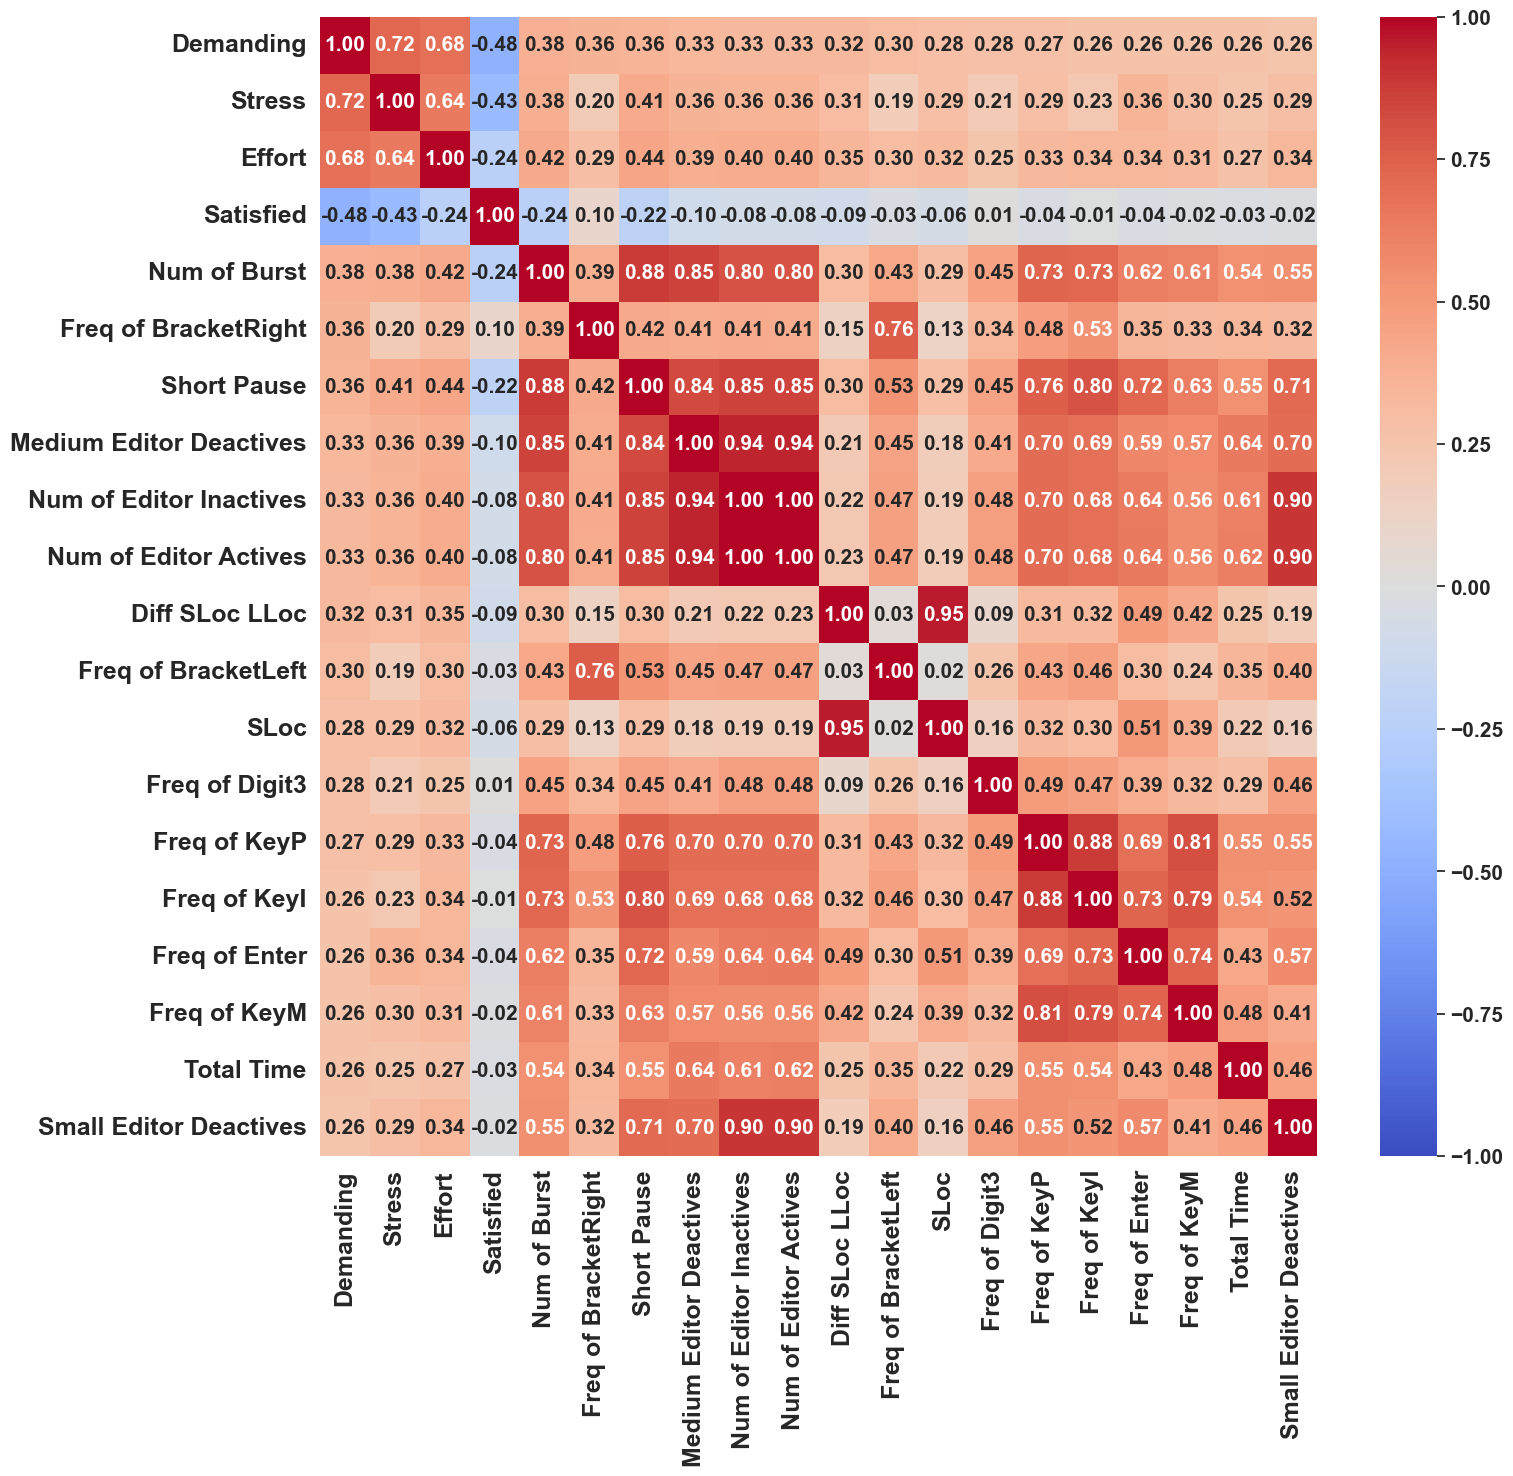

In [44]:
# correlation matrix 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns 
X = all_features_df_copy[['Demanding', 'Stress', 'Effort', 'Satisfied', 
                        'Num of Burst', 'Freq of BracketRight', 'Short Pause', 'Medium Editor Deactives', 
                        'Num of Editor Inactives', 'Num of Editor Actives', 'Diff SLoc LLoc', 
                        'Freq of BracketLeft', 'SLoc', 'Freq of Digit3', 'Freq of KeyP', 'Freq of KeyI', 
                        'Freq of Enter', 'Freq of KeyM', 'Total Time', 'Small Editor Deactives']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#df_scaled = pd.DataFrame(X_scaled, columns=df.columns)
df_scaled = pd.DataFrame(X_scaled, columns=['Demanding', 'Stress', 'Effort', 'Satisfied',
                                            'Num of Burst', 'Freq of BracketRight', 'Short Pause', 'Medium Editor Deactives', 
                                            'Num of Editor Inactives', 'Num of Editor Actives', 'Diff SLoc LLoc', 
                                            'Freq of BracketLeft', 'SLoc', 'Freq of Digit3', 'Freq of KeyP', 'Freq of KeyI', 
                                            'Freq of Enter', 'Freq of KeyM', 'Total Time', 'Small Editor Deactives'])


# Calculate the correlation matrix
correlation_matrix = df_scaled.corr()


# Create a heatmap
plt.figure(figsize=(16, 15))
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# Create heatmap and store Axes
ax = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    annot_kws={"size": 15, "weight": "bold"},
    #cbar_kws={"label": "Correlation"}  # optional colorbar label
)

# Make title and ticks bold
# plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold', rotation=90)
plt.yticks(fontsize=18, fontweight='bold', rotation=0)

# Make colorbar (legend) bold
colorbar = ax.collections[0].colorbar
colorbar.ax.yaxis.label.set_size(15)
colorbar.ax.yaxis.label.set_weight("bold")  # Bold colorbar label
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontweight("bold")
    tick.set_fontsize(15)

plt.tight_layout()
plt.savefig("correlation_heatmap.eps", format='eps', dpi=500)
plt.show()


In [5]:
# Change user_id to 'S1, ..., S19'
all_features_df['user_id'] = all_features_df['user_id'].str.replace(r'Student_(\d+)', r'S\1', regex=True)
all_features_df

user_id  exercise_id             category difficulty  \
0        S1          586            for_loops       easy   
1        S1          683            for_loops     medium   
2        S1          760            for_loops       hard   
3        S1          434            recursion       easy   
4        S1          568            recursion     medium   
..      ...          ...                  ...        ...   
166     S19          568            recursion     medium   
167     S19          547            recursion       hard   
168     S19         2171  classes_and_objects       easy   
169     S19         1949  classes_and_objects     medium   
170     S19         2135  classes_and_objects       hard   

     Cyclomatic_Complexity  Halstead_Difficulty  Halstead_Effort  \
0                        0                    1                0   
1                       13                   30               26   
2                        4                   14               12   
3                        4                    8                8   
4                        3                   14               12   
..                     ...                  ...              ...   
166                      2                    8                6   
167                      3                   10                9   
168                      5                   13                8   
169                      7                   16               11   
170                     10                   26               20   

     Halstead_Volume  Halstead_Time  SLoC  ...  Class_Def  Inst_Var  Math_Op  \
0                  0              1     0  ...         -1        -1       -1   
1                 24              0     6  ...         -1        -1        1   
2                 11              0     3  ...         -1        -1        1   
3                  6              0     2  ...         -1        -1        1   
4                 10              0     4  ...         -1        -1       -1   
..               ...            ...   ...  ...        ...       ...      ...   
166                5              1     2  ...         -1        -1       -1   
167                7              1     2  ...         -1        -1       -1   
168                8              1     4  ...          1         1        1   
169               11              1     4  ...          1         0        1   
170               20              1     5  ...          1         1        1   

     List_Op  Str_Op  Nested_Data  Error_Handling  State_Management  Math_Seq  \
0         -1      -1           -1              -1                -1        -1   
1          1      -1           -1              -1                -1         0   
2          1       1           -1              -1                -1        -1   
3         -1      -1           -1              -1                -1         1   
4         -1       1           -1              -1                -1        -1   
..       ...     ...          ...             ...               ...       ...   
166       -1       0           -1              -1                -1        -1   
167        1      -1            1              -1                -1        -1   
168       -1      -1           -1              -1                -1        -1   
169       -1      -1           -1              -1                -1        -1   
170       -1      -1           -1              -1                -1        -1   

     Cognitive_Load  
0               1.6  
1               3.9  
2               2.9  
3               0.1  
4               4.0  
..              ...  
166             0.4  
167             1.3  
168             0.4  
169             1.7  
170             0.7  

[171 rows x 145 columns]

In [15]:
# Change exercise number with E1, ..., E9
exercises = all_features_df['exercise_id'].unique()
exercise_mapping = {exercises[i]: f'E{i+1}' for i in range(len(exercises))}
all_features_df['exercise_id'] = all_features_df['exercise_id'].replace(exercise_mapping)
all_features_df

user_id exercise_id             category difficulty  \
0        S1          E1            for_loops       easy   
1        S1          E2            for_loops     medium   
2        S1          E3            for_loops       hard   
3        S1          E4            recursion       easy   
4        S1          E5            recursion     medium   
..      ...         ...                  ...        ...   
166     S19          E5            recursion     medium   
167     S19          E6            recursion       hard   
168     S19          E7  classes_and_objects       easy   
169     S19          E8  classes_and_objects     medium   
170     S19          E9  classes_and_objects       hard   

     Cyclomatic_Complexity  Halstead_Difficulty  Halstead_Effort  \
0                        0                    1                0   
1                       13                   30               26   
2                        4                   14               12   
3                        4                    8                8   
4                        3                   14               12   
..                     ...                  ...              ...   
166                      2                    8                6   
167                      3                   10                9   
168                      5                   13                8   
169                      7                   16               11   
170                     10                   26               20   

     Halstead_Volume  Halstead_Time  SLoC  ...  Class_Def  Inst_Var  Math_Op  \
0                  0              1     0  ...         -1        -1       -1   
1                 24              0     6  ...         -1        -1        1   
2                 11              0     3  ...         -1        -1        1   
3                  6              0     2  ...         -1        -1        1   
4                 10              0     4  ...         -1        -1       -1   
..               ...            ...   ...  ...        ...       ...      ...   
166                5              1     2  ...         -1        -1       -1   
167                7              1     2  ...         -1        -1       -1   
168                8              1     4  ...          1         1        1   
169               11              1     4  ...          1         0        1   
170               20              1     5  ...          1         1        1   

     List_Op  Str_Op  Nested_Data  Error_Handling  State_Management  Math_Seq  \
0         -1      -1           -1              -1                -1        -1   
1          1      -1           -1              -1                -1         0   
2          1       1           -1              -1                -1        -1   
3         -1      -1           -1              -1                -1         1   
4         -1       1           -1              -1                -1        -1   
..       ...     ...          ...             ...               ...       ...   
166       -1       0           -1              -1                -1        -1   
167        1      -1            1              -1                -1        -1   
168       -1      -1           -1              -1                -1        -1   
169       -1      -1           -1              -1                -1        -1   
170       -1      -1           -1              -1                -1        -1   

     Cognitive_Load  
0               1.6  
1               3.9  
2               2.9  
3               0.1  
4               4.0  
..              ...  
166             0.4  
167             1.3  
168             0.4  
169             1.7  
170             0.7  

[171 rows x 145 columns]

/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/1932403929.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = all_features_df.groupby('user_id')['total_keystrokes'].mean().reindex(student_order)
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/1932403929.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


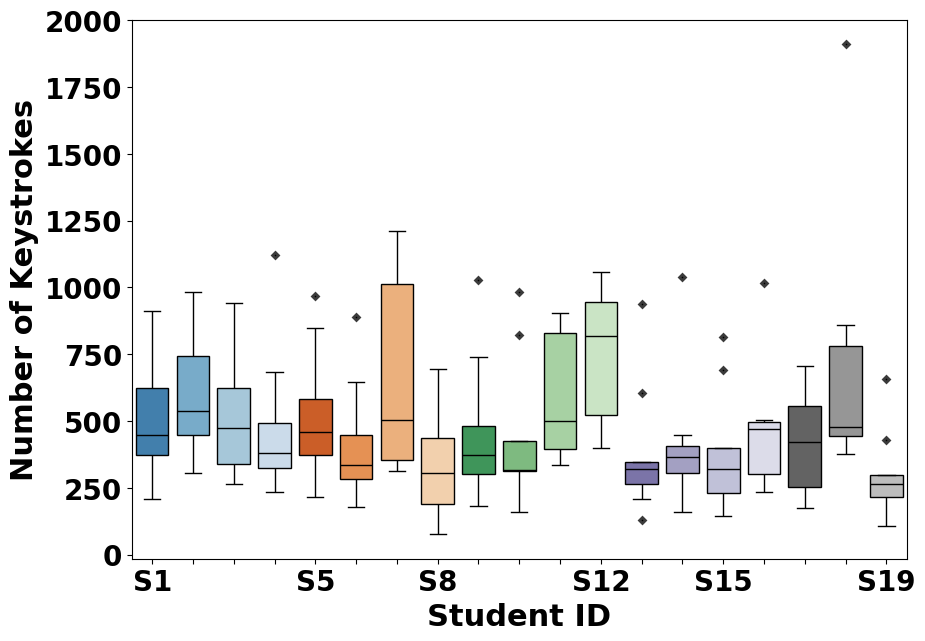

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))

student_order = [f"S{i+1}" for i in range(19)]
means = all_features_df.groupby('user_id')['total_keystrokes'].mean().reindex(student_order)

sns.boxplot(
    x='user_id', 
    y='total_keystrokes', 
    data=all_features_df, 
    palette='tab20c',
    flierprops=dict(marker='D', markersize=3, markerfacecolor='black', markeredgewidth=2),  # Customize fliers
    order=student_order,
    boxprops=dict(linewidth=1, edgecolor='black'),  # Set box outline to bold black
    whiskerprops=dict(linewidth=1, color='black'),  # Set whisker outline to bold black
    capprops=dict(linewidth=1, color='black'),  # Set caps outline to bold black
    medianprops=dict(linewidth=1, color='black')  # Set median line to bold black  
)

# Overlay the mean line
#plt.plot(np.arange(len(means)), means, color='r', marker='o', label='Mean', 
#        linewidth=0.75, markersize=3)  

# Set the x-ticks to show all positions
plt.xticks(ticks=np.arange(len(student_order)), labels=student_order)

# Customize x-tick labels: only show for S1, S5, S10, S15, S19, keep others empty
labels = ['' for _ in range(len(student_order))]
selected_labels = ['S1', 'S5', 'S8', 'S12', 'S15', 'S19']
selected_ticks = [0, 4, 7, 11, 14, 18]  # Indices of S1, S5, S10, S15, S19

# Set the selected labels
for i, tick in enumerate(selected_ticks):
    labels[tick] = selected_labels[i]

# Apply the new labels to the x-ticks
plt.xticks(ticks=np.arange(len(student_order)), labels=labels)

# Set y-axis label (bold)
plt.ylabel('Number of Keystrokes', fontsize=22, fontweight='bold')
plt.xlabel('Student ID', fontsize=22, fontweight='bold')  

plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

#plt.legend(fontsize=20)

plt.savefig('./plot_eps/Student_Keystrokes_Count.eps', format='eps') 
plt.show()


/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/3645457364.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = all_features_df.groupby('user_id')['demanding'].mean().reindex(student_order)
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/3645457364.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


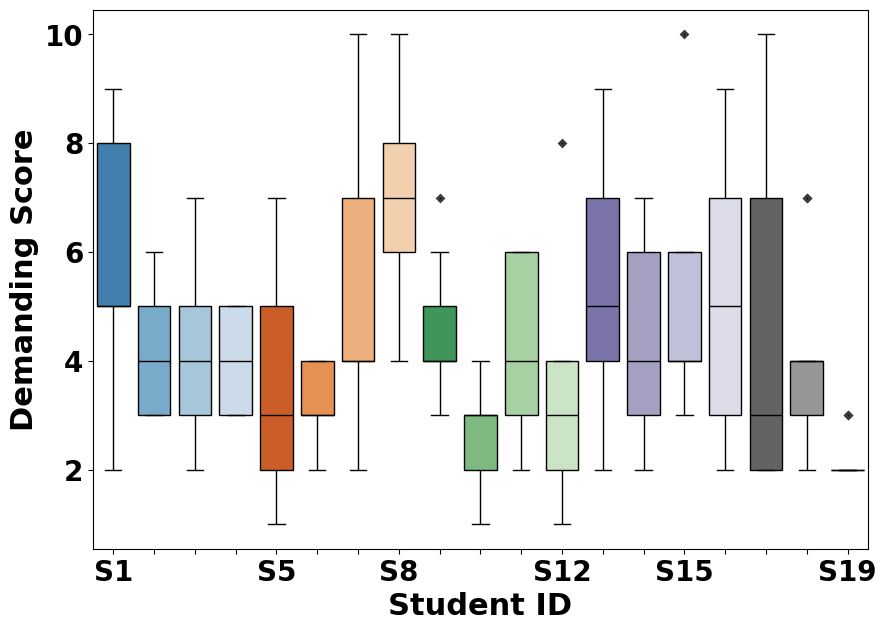

In [37]:
# Demanding scores plot
plt.figure(figsize=(10, 7))

student_order = [f"S{i+1}" for i in range(19)]
means = all_features_df.groupby('user_id')['demanding'].mean().reindex(student_order)

sns.boxplot(
    x='user_id', 
    y='demanding', 
    data=all_features_df, 
    palette='tab20c',
    flierprops=dict(marker='D', markersize=3, markerfacecolor='black', markeredgewidth=2),  # Customize fliers
    order=student_order,
    boxprops=dict(linewidth=1, edgecolor='black'),  # Set box outline to bold black
    whiskerprops=dict(linewidth=1, color='black'),  # Set whisker outline to bold black
    capprops=dict(linewidth=1, color='black'),  # Set caps outline to bold black
    medianprops=dict(linewidth=1, color='black')  # Set median line to bold black  
)

# Overlay the mean line
#plt.plot(np.arange(len(means)), means, color='r', marker='o', label='Mean', 
#         linewidth=0.75, markersize=3)  

# Set the x-ticks to show all positions
plt.xticks(ticks=np.arange(len(student_order)), labels=student_order)

# Customize x-tick labels: only show for S1, S5, S10, S15, S19, keep others empty
labels = ['' for _ in range(len(student_order))]
selected_labels = ['S1', 'S5', 'S8', 'S12', 'S15', 'S19']
selected_ticks = [0, 4, 7, 11, 14, 18]  # Indices of S1, S5, S10, S15, S19

# Set the selected labels
for i, tick in enumerate(selected_ticks):
    labels[tick] = selected_labels[i]

# Apply the new labels to the x-ticks
plt.xticks(ticks=np.arange(len(student_order)), labels=labels)

# Set y-axis label (bold)
plt.ylabel('Demanding Score', fontsize=22, fontweight='bold')
plt.xlabel('Student ID', fontsize=22, fontweight='bold')  

plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

#plt.legend(fontsize=20)

plt.savefig('./plot_eps/Student_Demanding_Scores.eps', format='eps') 

plt.show()


/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/1100211219.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


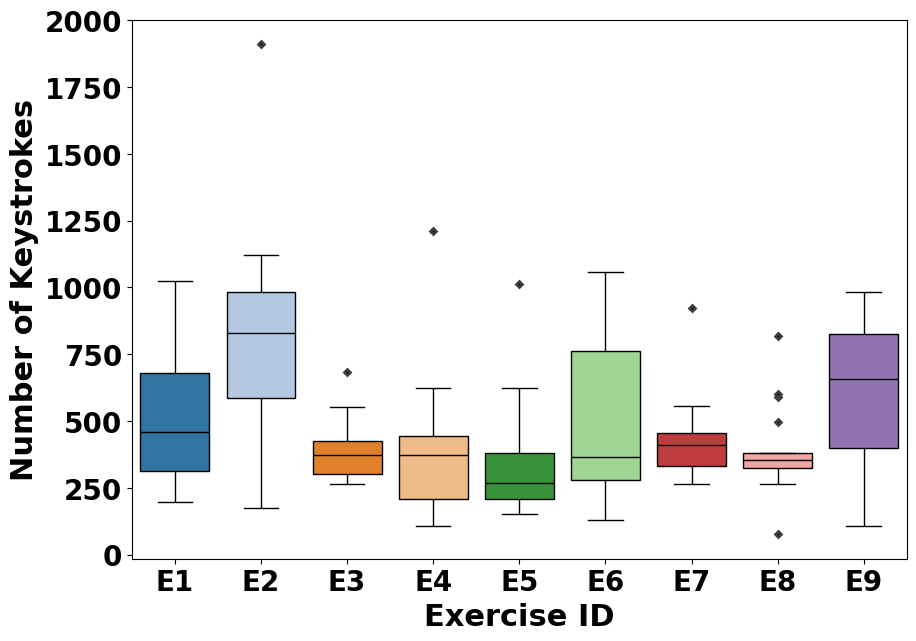

In [27]:
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))

exercise_map = {exercise: f"E{i+1}" for i, exercise in enumerate(all_features_df['exercise_id'].unique())}
all_features_df['exercise_id'] = all_features_df['exercise_id'].map(exercise_map)
exercise_order = [f"E{i+1}" for i in range(9)]

sns.boxplot(
    x='exercise_id', 
    y='total_keystrokes', 
    data=all_features_df, 
    palette='tab20',
    flierprops=dict(marker='D', markersize=3, markerfacecolor='black', markeredgewidth=2),  # Customize fliers
    order=exercise_order,
    boxprops=dict(linewidth=1, edgecolor='black'),  # Set box outline to bold black
    whiskerprops=dict(linewidth=1, color='black'),  # Set whisker outline to bold black
    capprops=dict(linewidth=1, color='black'),  # Set caps outline to bold black
    medianprops=dict(linewidth=1, color='black')  # Set median line to bold black
)

# Calculate the means for each exercise
means = all_features_df.groupby('exercise_id')['total_keystrokes'].mean().reindex(exercise_order)

# Overlay the mean line
#plt.plot(np.arange(len(means)), means, color='r', marker='o', label='Mean', 
#         linewidth=0.75, markersize=3)  

# Set the x-ticks to show all positions
plt.xticks(ticks=np.arange(len(exercise_order)), labels=exercise_order)

# Set y-axis label (bold)
plt.ylabel('Number of Keystrokes', fontsize=22, fontweight='bold')
plt.xlabel('Exercise ID', fontsize=22, fontweight='bold') 

plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

#plt.legend(fontsize=20)

plt.savefig('./plot_eps/Exercise_Keystrokes_Count.eps', format='eps') 

plt.show()


/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/3446478450.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


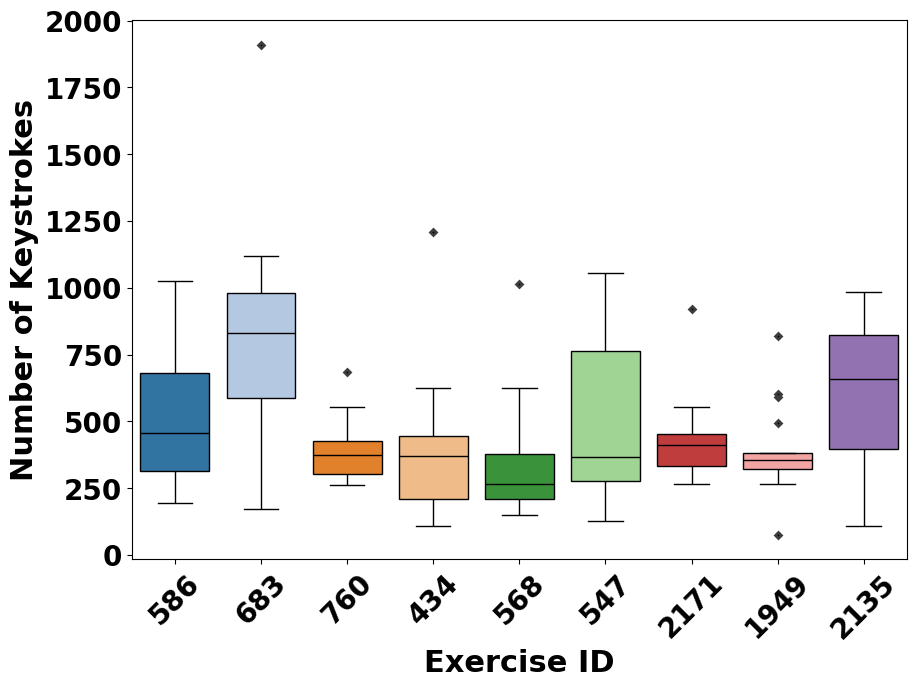

In [14]:
# Plot Exercise-Keystrokes
plt.figure(figsize=(10,7))

exercise_order = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]

sns.boxplot(
    x='exercise_id', 
    y='total_keystrokes', 
    data=all_features_df, 
    palette='tab20',
    flierprops=dict(marker='D', markersize=3, markerfacecolor='black', markeredgewidth=2),  # Customize fliers
    order=exercise_order,
    boxprops=dict(linewidth=1, edgecolor='black'),  # Set box outline to bold black
    whiskerprops=dict(linewidth=1, color='black'),  # Set whisker outline to bold black
    capprops=dict(linewidth=1, color='black'),  # Set caps outline to bold black
    medianprops=dict(linewidth=1, color='black')  # Set median line to bold black
)

# Calculate the means for each exercise
means = all_features_df.groupby('exercise_id')['total_keystrokes'].mean()

# Overlay the mean line
#plt.plot(np.arange(len(means)), means, color='r', marker='o', label='Mean', 
#        linewidth=0.75, markersize=3) 

# Set y-axis label (bold)
plt.ylabel('Number of Keystrokes', fontsize=22, fontweight='bold')
plt.xlabel('Exercise ID', fontsize=22, fontweight='bold')  

plt.xticks(fontsize=20, rotation=45, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

#plt.legend(fontsize=20)

#plt.savefig('./plot_eps/Exercise_Keystrokes_Count.eps', format='eps') 

plt.show()


/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/3868652192.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


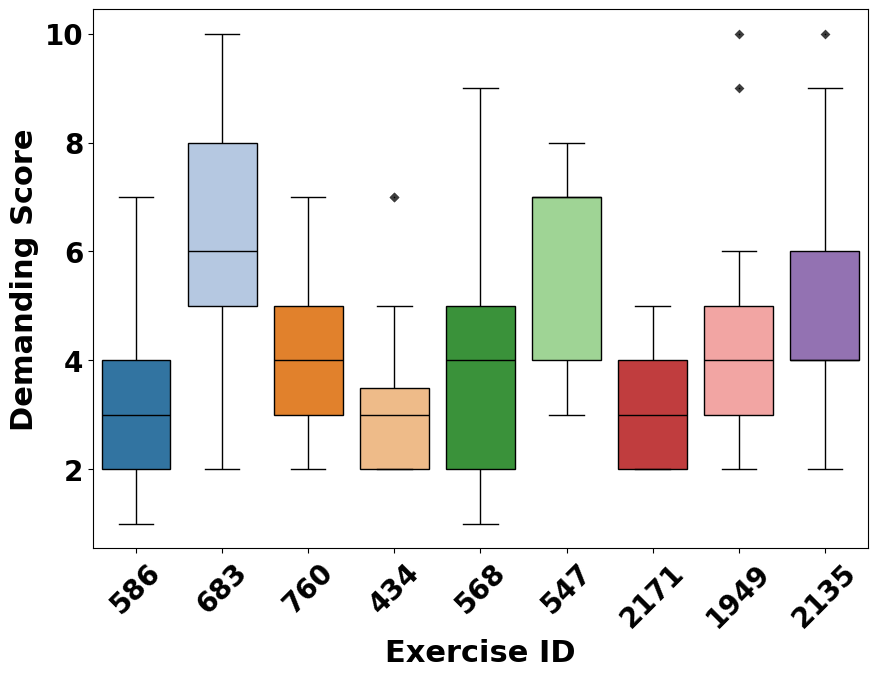

In [11]:
# Plot Exercise-Keystrokes
plt.figure(figsize=(10,7))

exercise_order = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]

sns.boxplot(
    x='exercise_id', 
    y='demanding', 
    data=all_features_df, 
    palette='tab20',
    flierprops=dict(marker='D', markersize=3, markerfacecolor='black', markeredgewidth=2),  # Customize fliers
    order=exercise_order,
    boxprops=dict(linewidth=1, edgecolor='black'),  # Set box outline to bold black
    whiskerprops=dict(linewidth=1, color='black'),  # Set whisker outline to bold black
    capprops=dict(linewidth=1, color='black'),  # Set caps outline to bold black
    medianprops=dict(linewidth=1, color='black')  # Set median line to bold black
)

# Calculate the means for each exercise
means = all_features_df.groupby('exercise_id')['demanding'].mean()

# Overlay the mean line (optional)
#plt.plot(np.arange(len(means)), means, color='r', marker='o', label='Mean', 
#        linewidth=0.75, markersize=3)

# Set y-axis label (bold)
plt.ylabel('Demanding Score', fontsize=22, fontweight='bold')
plt.xlabel('Exercise ID', fontsize=22, fontweight='bold')  

plt.xticks(fontsize=20, rotation=45, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

# Show the plot
plt.show()


/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/2790850284.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


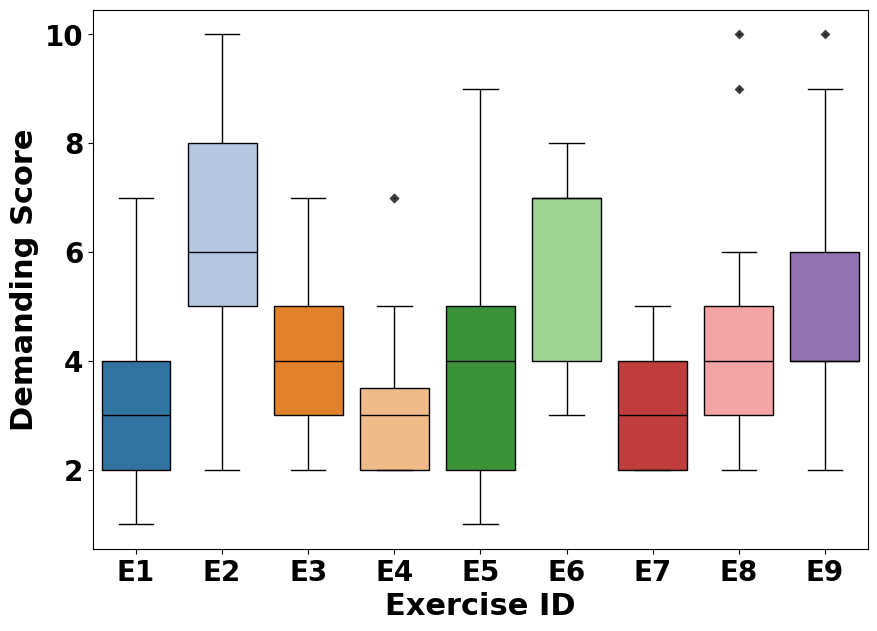

In [28]:
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))

exercise_map = {exercise: f"E{i+1}" for i, exercise in enumerate(all_features_df['exercise_id'].unique())}
all_features_df['exercise_id'] = all_features_df['exercise_id'].map(exercise_map)
exercise_order = [f"E{i+1}" for i in range(9)]

sns.boxplot(
    x='exercise_id', 
    y='demanding', 
    data=all_features_df, 
    palette='tab20',
    flierprops=dict(marker='D', markersize=3, markerfacecolor='black', markeredgewidth=2),  # Customize fliers
    order=exercise_order,
    boxprops=dict(linewidth=1, edgecolor='black'),  # Set box outline to bold black
    whiskerprops=dict(linewidth=1, color='black'),  # Set whisker outline to bold black
    capprops=dict(linewidth=1, color='black'),  # Set caps outline to bold black
    medianprops=dict(linewidth=1, color='black')  # Set median line to bold black
)

# Calculate the means for each exercise
means = all_features_df.groupby('exercise_id')['demanding'].mean().reindex(exercise_order)

# Overlay the mean line
#plt.plot(np.arange(len(means)), means, color='r', marker='o', label='Mean', 
#         linewidth=0.75, markersize=3)  

# Set the x-ticks to show all positions
plt.xticks(ticks=np.arange(len(exercise_order)), labels=exercise_order)

# Set y-axis label (bold)
plt.ylabel('Demanding Score', fontsize=22, fontweight='bold')
plt.xlabel('Exercise ID', fontsize=22, fontweight='bold')  

plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

#plt.legend(fontsize=20)

plt.savefig('./plot_eps/Exercise_Demanding_Scores.eps', format='eps') 

plt.show()


In [29]:
# Average values of all CL factors (demanding, effort, satisfied, stress) for all students
all_features_df['user_id'] = pd.Categorical(all_features_df['user_id'], categories=[f'S{i}' for i in range(1, 20)], ordered=True)
avg_cl_student = all_features_df.groupby('user_id')[['demanding', 'effort', 'satisfied', 'stress']].mean().reset_index().round(3)
avg_cl_student

/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/3207100371.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cl_student = all_features_df.groupby('user_id')[['demanding', 'effort', 'satisfied', 'stress']].mean().reset_index().round(3)


user_id  demanding  effort  satisfied  stress
0       S1      5.889   3.444      4.556   2.889
1       S2      4.000   2.556      4.000   2.000
2       S3      4.000   2.889      4.000   2.333
3       S4      4.111   3.222      4.556   2.667
4       S5      3.444   2.444      4.333   2.111
5       S6      3.333   3.222      4.000   2.000
6       S7      5.333   3.556      3.556   2.778
7       S8      7.000   3.556      2.111   3.556
8       S9      4.556   2.333      4.889   1.667
9      S10      2.556   1.778      4.444   1.889
10     S11      4.333   2.778      4.778   2.000
11     S12      3.333   2.556      3.222   1.778
12     S13      5.333   2.778      4.111   2.778
13     S14      4.333   3.111      4.556   2.556
14     S15      5.111   3.778      3.333   3.111
15     S16      5.000   3.222      4.444   2.667
16     S17      4.778   4.111      4.222   2.111
17     S18      4.111   3.222      3.889   2.667
18     S19      2.222   2.444      4.889   1.111

In [30]:
avg_cl_student = avg_cl_student.rename(columns={
    'demanding': 'Demanding',
    'effort': 'Effort',
    'satisfied': 'Satisfied',
    'stress':'Stress'
})
avg_cl_student

user_id  Demanding  Effort  Satisfied  Stress
0       S1      5.889   3.444      4.556   2.889
1       S2      4.000   2.556      4.000   2.000
2       S3      4.000   2.889      4.000   2.333
3       S4      4.111   3.222      4.556   2.667
4       S5      3.444   2.444      4.333   2.111
5       S6      3.333   3.222      4.000   2.000
6       S7      5.333   3.556      3.556   2.778
7       S8      7.000   3.556      2.111   3.556
8       S9      4.556   2.333      4.889   1.667
9      S10      2.556   1.778      4.444   1.889
10     S11      4.333   2.778      4.778   2.000
11     S12      3.333   2.556      3.222   1.778
12     S13      5.333   2.778      4.111   2.778
13     S14      4.333   3.111      4.556   2.556
14     S15      5.111   3.778      3.333   3.111
15     S16      5.000   3.222      4.444   2.667
16     S17      4.778   4.111      4.222   2.111
17     S18      4.111   3.222      3.889   2.667
18     S19      2.222   2.444      4.889   1.111

/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/2069253557.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_groups = avg_cl_student.groupby('user_id')[['Demanding', 'Effort', 'Satisfied', 'Stress']].mean()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


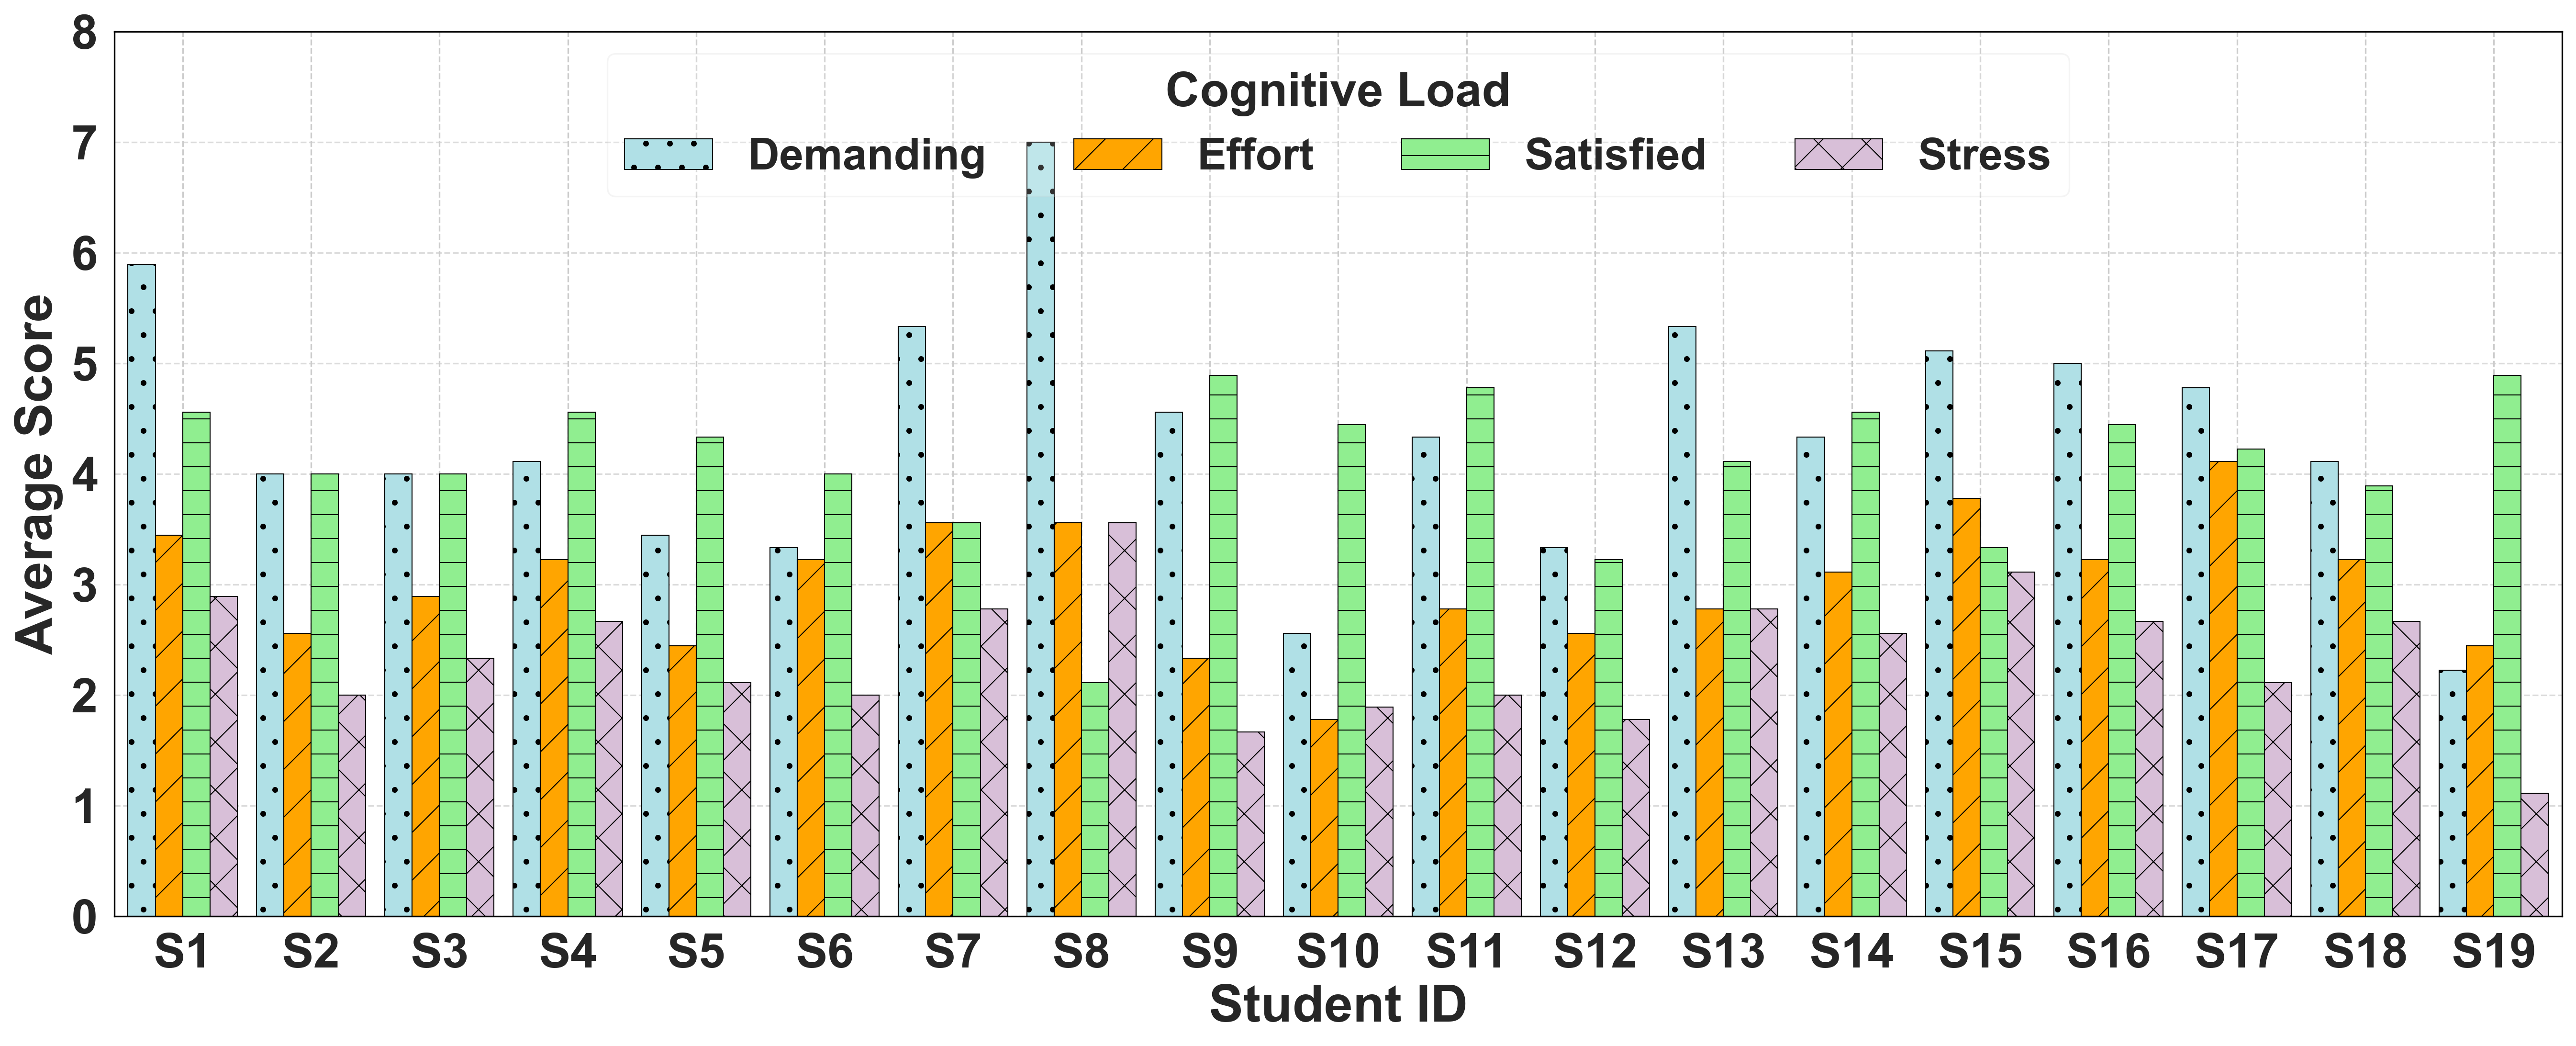

In [137]:
# Group by students and calculate the mean for each category
student_groups = avg_cl_student.groupby('user_id')[['Demanding', 'Effort', 'Satisfied', 'Stress']].mean()

bar_width = 1 # Increase this to make bars wider
group_spacing = 0.7  # Increase this for more separation between groups
bar_spacing = 0  # Increase this for more space between individual bars

# Initialize figure
plt.figure(figsize=(22, 8))

plt.rcParams['hatch.linewidth'] = 0.5


# Set colors and patterns for the bars
#tab20c_colors = plt.get_cmap('Paired').colors  

#colors = [tab20c_colors[i] for i in range(4)]
colors = ['powderblue', 'orange', 'lightgreen', 'thistle']
patterns = ['.', '/', '-', 'x']



# Get the number of students id and columns
x = np.arange(len(student_groups.index)) * (len(student_groups.columns) * (bar_width + bar_spacing) + group_spacing)
columns = student_groups.columns



# Plot bars
for i, column in enumerate(columns):
    bars = plt.bar(
        x + i * (bar_width + bar_spacing),
        student_groups[column],
        bar_width,  # Set the width of the bars
        label=column,
        color=colors[i],
        edgecolor='black',  # Black border
        linewidth=0.5,
        hatch=patterns[i]  # Background patterns
    )

plt.xlim(x[0] - bar_width, x[-1] + len(columns) * (bar_width + bar_spacing))

# Customize axes and labels
plt.xlabel("Student ID", fontsize=26, fontweight='bold')
plt.ylabel("Average Score", fontsize=26, fontweight='bold')
plt.xticks(x + (len(columns) - 1) * (bar_width + bar_spacing) / 2, student_groups.index, fontsize=24, fontweight='bold')
plt.yticks(np.arange(0, np.ceil(student_groups.max().max()) + 2, 1), fontsize=24, fontweight='bold')

# Set the legend with bold title and labels
legend = plt.legend(
    title="Cognitive Load",
    fontsize=22,
    title_fontsize=24,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.0),
    ncol=len(columns),
    frameon=True,
    framealpha=0.2,
    facecolor='white'
)

# Set legend title and labels to bold
legend.get_title().set_fontweight('bold')
for label in legend.get_texts():
    label.set_fontweight('bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('./plot_eps/Students_vs_CLFactors_Scores.eps', format='eps') 
plt.show()


In [32]:
avg_cl_exercise = all_features_df.groupby('exercise_id')[['demanding', 'effort', 'satisfied', 'stress']].mean().reset_index().round(3)
avg_cl_exercise

exercise_id  demanding  effort  satisfied  stress
0          E1      3.158   2.316      4.105   1.895
1          E2      6.105   3.895      4.000   2.842
2          E3      4.368   2.947      4.000   2.211
3          E4      3.263   2.158      4.211   1.789
4          E5      4.211   3.000      4.053   2.316
5          E6      5.684   3.684      3.895   2.526
6          E7      3.105   2.579      4.737   2.053
7          E8      4.421   3.105      4.000   2.632
8          E9      4.895   3.316      3.895   2.895

In [33]:
avg_cl_exercise = avg_cl_exercise.rename(columns={
    'demanding': 'Demanding',
    'effort': 'Effort',
    'satisfied': 'Satisfied',
    'stress':'Stress'
})
avg_cl_exercise

exercise_id  Demanding  Effort  Satisfied  Stress
0          E1      3.158   2.316      4.105   1.895
1          E2      6.105   3.895      4.000   2.842
2          E3      4.368   2.947      4.000   2.211
3          E4      3.263   2.158      4.211   1.789
4          E5      4.211   3.000      4.053   2.316
5          E6      5.684   3.684      3.895   2.526
6          E7      3.105   2.579      4.737   2.053
7          E8      4.421   3.105      4.000   2.632
8          E9      4.895   3.316      3.895   2.895

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


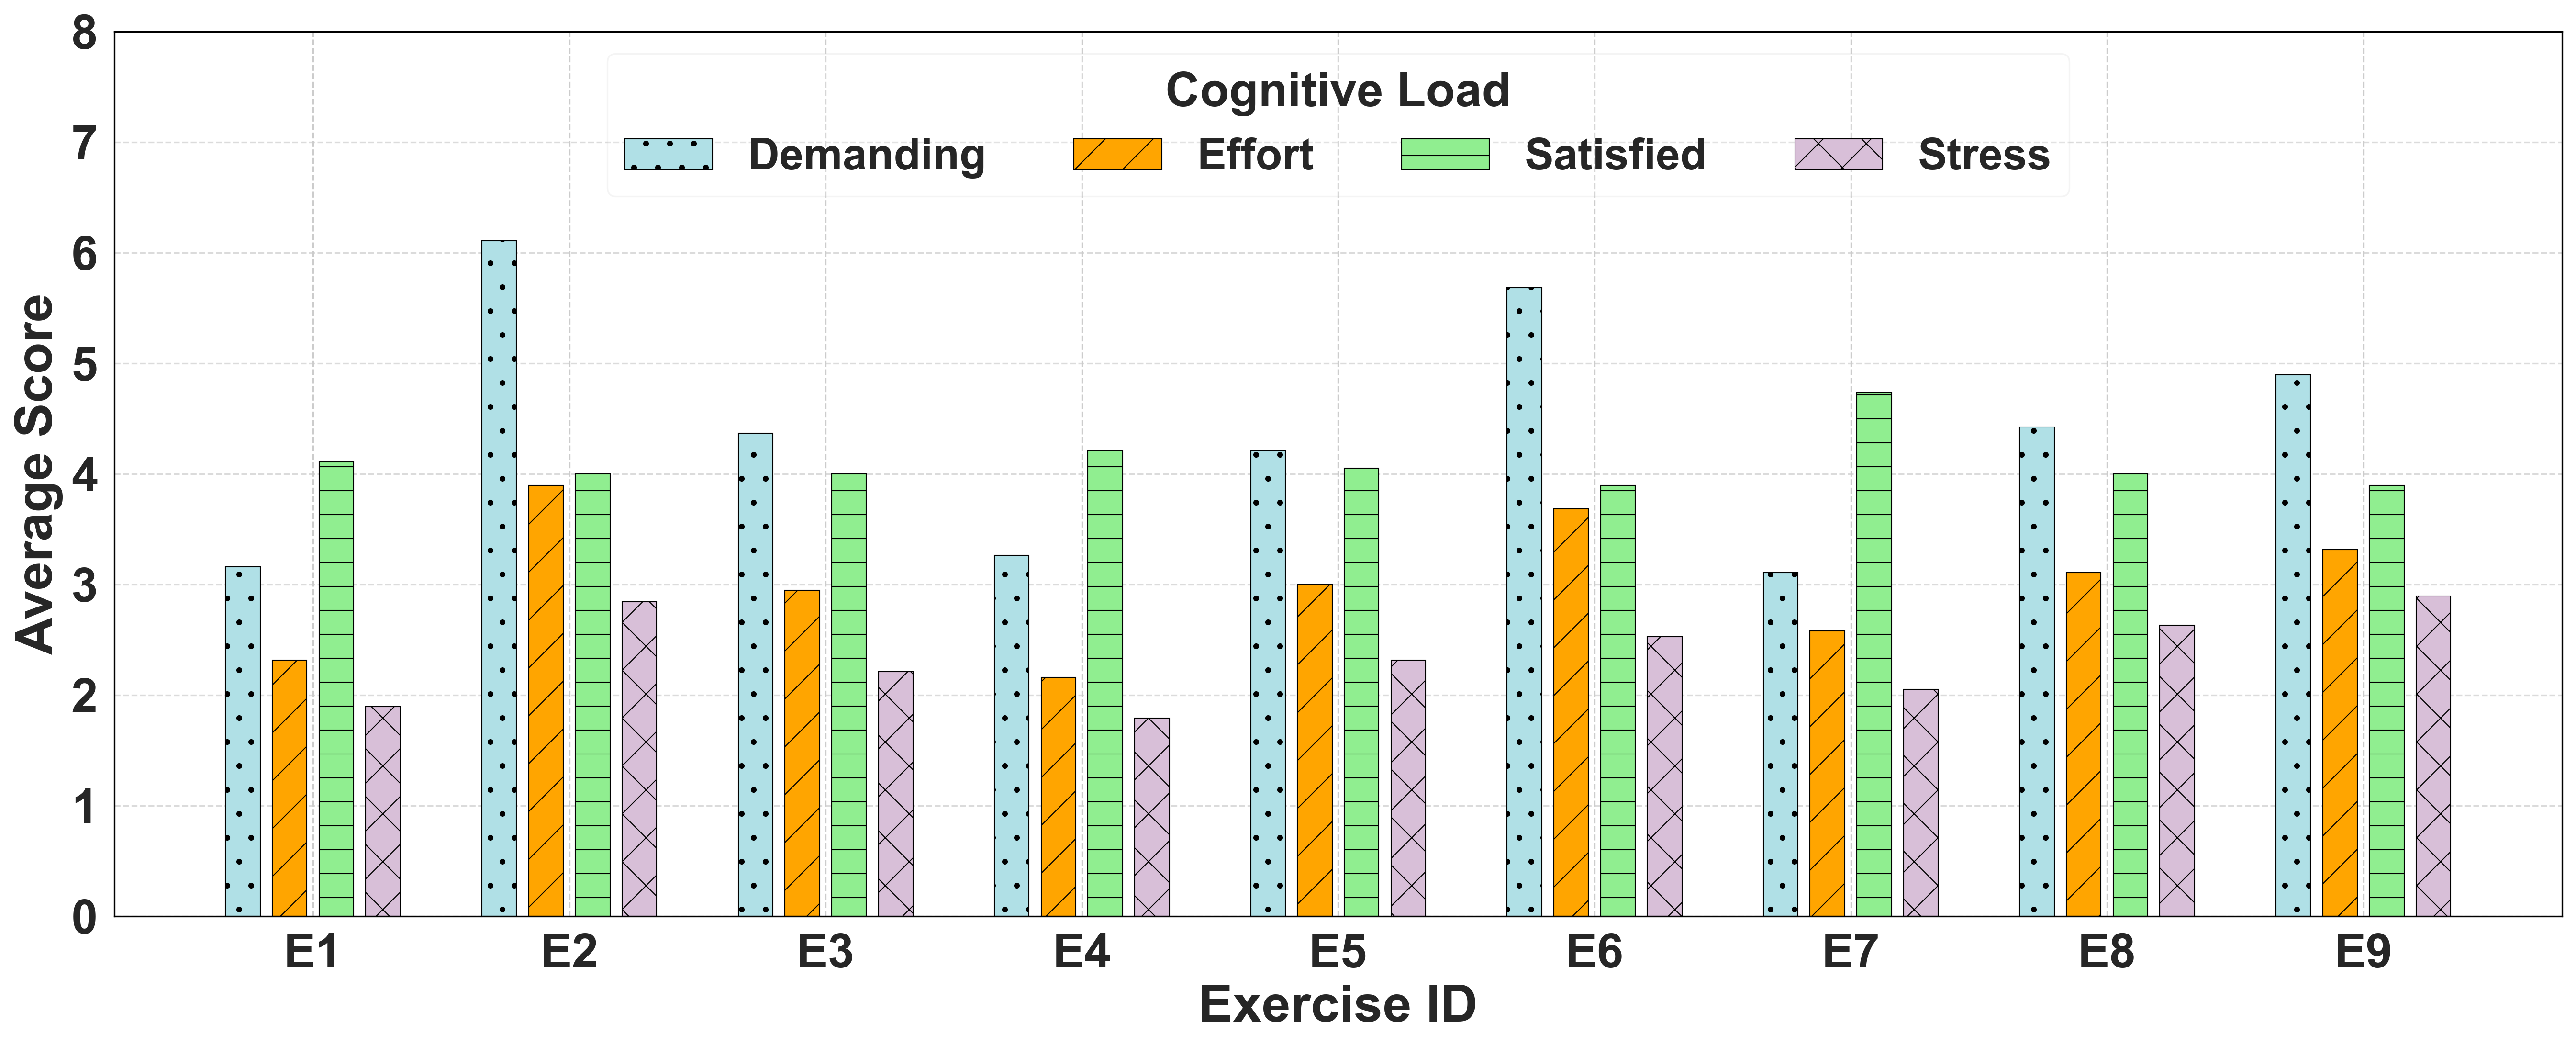

In [136]:
# Group by exercises and calculate the mean for each category
exercise_groups = avg_cl_exercise.groupby('exercise_id')[['Demanding', 'Effort', 'Satisfied', 'Stress']].mean()

bar_width = 0.2
group_spacing = 0.4  # Increase this value for more separation
bar_spacing = 0.07

# Initialize figure
plt.figure(figsize=(22, 8))

plt.rcParams['hatch.linewidth'] = 0.5

# Set colors and patterns for the bars
colors = ['powderblue', 'orange', 'lightgreen', 'thistle']
#colors = ['skyblue', 'lightgreen', 'salmon', 'orange']
patterns = ['.', '/', '-', 'x']

# Get the number of exercises and columns
x = np.arange(len(exercise_groups.index)) * (len(exercise_groups.columns) * (bar_width + bar_spacing) + group_spacing)
columns = exercise_groups.columns

# Create custom labels for exercises (E1, E2, E3, ...)
exercise_labels = [f'E{i+1}' for i in range(len(exercise_groups.index))]

# Plot bars
for i, column in enumerate(columns):
    bars = plt.bar(
        x + i * (bar_width + bar_spacing),
        exercise_groups[column],
        bar_width,
        label=column,
        color=colors[i],
        edgecolor='black',  # Black border
        linewidth=0.5,
        hatch=patterns[i]  # Background patterns
    )
    # Add value labels on the bars
    #for bar in bars:
    #    plt.text(
    #        bar.get_x() + bar.get_width() / 2,
    #        bar.get_height() + 0.02,
    #        f'{bar.get_height():.2f}',
    #        ha='center',
    #        va='bottom',
    #        fontsize=10
    #    )

# Customize axes and labels
#plt.title("Exercise vs Cognitive Load Factors", fontsize=22)
plt.xlabel("Exercise ID", fontsize=26, fontweight='bold')
plt.ylabel("Average Score", fontsize=26, fontweight='bold')
plt.xticks(x + (len(columns) - 1) * (bar_width + bar_spacing) / 2, exercise_labels, fontsize=24, fontweight='bold')  # Set custom x-tick labels
plt.yticks(np.arange(0, np.ceil(exercise_groups.max().max()) + 2, 1), fontsize=24, fontweight='bold')

# Set the legend with bold title and labels
legend = plt.legend(
    title="Cognitive Load",
    fontsize=22,
    title_fontsize=24,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.0),
    ncol=len(columns),
    frameon=True,
    framealpha=0.2,
    facecolor='white'
)

# Set legend title and labels to bold
legend.get_title().set_fontweight('bold')
for label in legend.get_texts():
    label.set_fontweight('bold')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('./plot_eps/Exercises_vs_CLFactors_Scores.eps', format='eps') 
plt.show()


/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/4054139059.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/4054139059.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


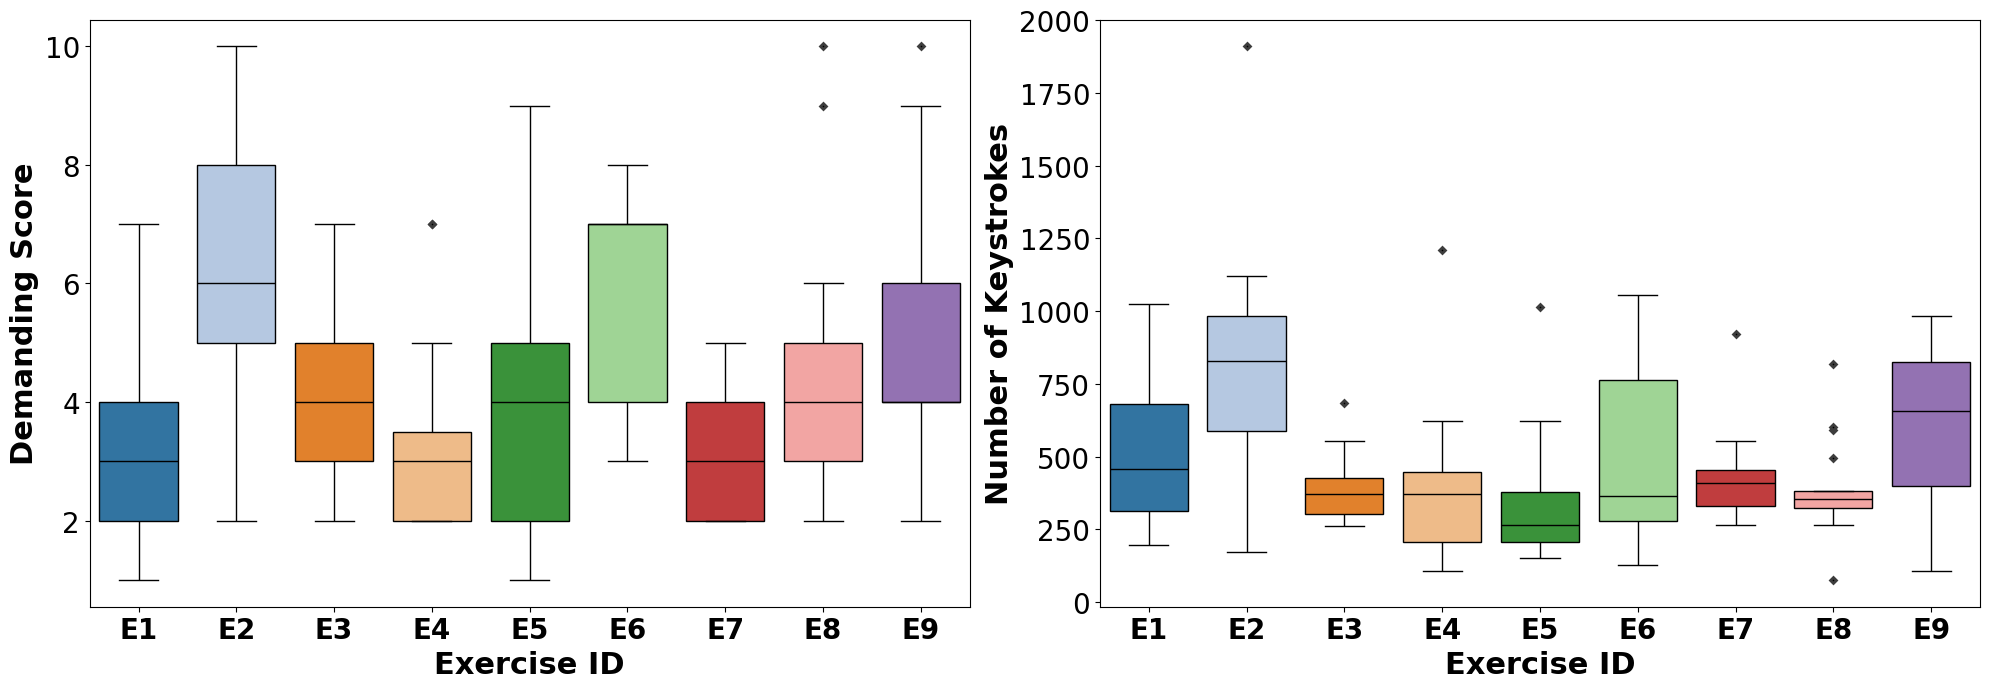

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(20, 7))  # 1 row, 2 columns

# Map exercise IDs to formatted labels
exercise_map = {exercise: f"E{i+1}" for i, exercise in enumerate(all_features_df['exercise_id'].unique())}
all_features_df['exercise_id'] = all_features_df['exercise_id'].map(exercise_map)
exercise_order = [f"E{i+1}" for i in range(9)]

# Plot 1: Boxplot for "Demanding Score"
sns.boxplot(
    ax=axes[0],
    x='exercise_id', 
    y='demanding', 
    data=all_features_df, 
    palette='tab20',
    flierprops=dict(marker='D', markersize=3, markerfacecolor='black', markeredgewidth=2),
    order=exercise_order,
    boxprops=dict(linewidth=1, edgecolor='black'),
    whiskerprops=dict(linewidth=1, color='black'),
    capprops=dict(linewidth=1, color='black'),
    medianprops=dict(linewidth=1, color='black')
)

axes[0].set_ylabel('Demanding Score', fontsize=22, fontweight='bold')
axes[0].set_xlabel('Exercise ID', fontsize=22, fontweight='bold')
axes[0].set_xticks(np.arange(len(exercise_order)))
axes[0].set_xticklabels(exercise_order, fontsize=20, fontweight='bold')
axes[0].tick_params(axis='y', labelsize=20)

# Plot 2: Boxplot for "Total Keystrokes"
sns.boxplot(
    ax=axes[1],
    x='exercise_id', 
    y='total_keystrokes', 
    data=all_features_df, 
    palette='tab20',
    flierprops=dict(marker='D', markersize=3, markerfacecolor='black', markeredgewidth=2),
    order=exercise_order,
    boxprops=dict(linewidth=1, edgecolor='black'),
    whiskerprops=dict(linewidth=1, color='black'),
    capprops=dict(linewidth=1, color='black'),
    medianprops=dict(linewidth=1, color='black')
)

axes[1].set_ylabel('Number of Keystrokes', fontsize=22, fontweight='bold')
axes[1].set_xlabel('Exercise ID', fontsize=22, fontweight='bold')
axes[1].set_xticks(np.arange(len(exercise_order)))
axes[1].set_xticklabels(exercise_order, fontsize=20, fontweight='bold')
axes[1].tick_params(axis='y', labelsize=20)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('./plot_eps/Exercise_Keystrokes_and_Demanding_Scores.eps', format='eps') 

# Show the plot
plt.show()


/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/4145542141.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/4145542141.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


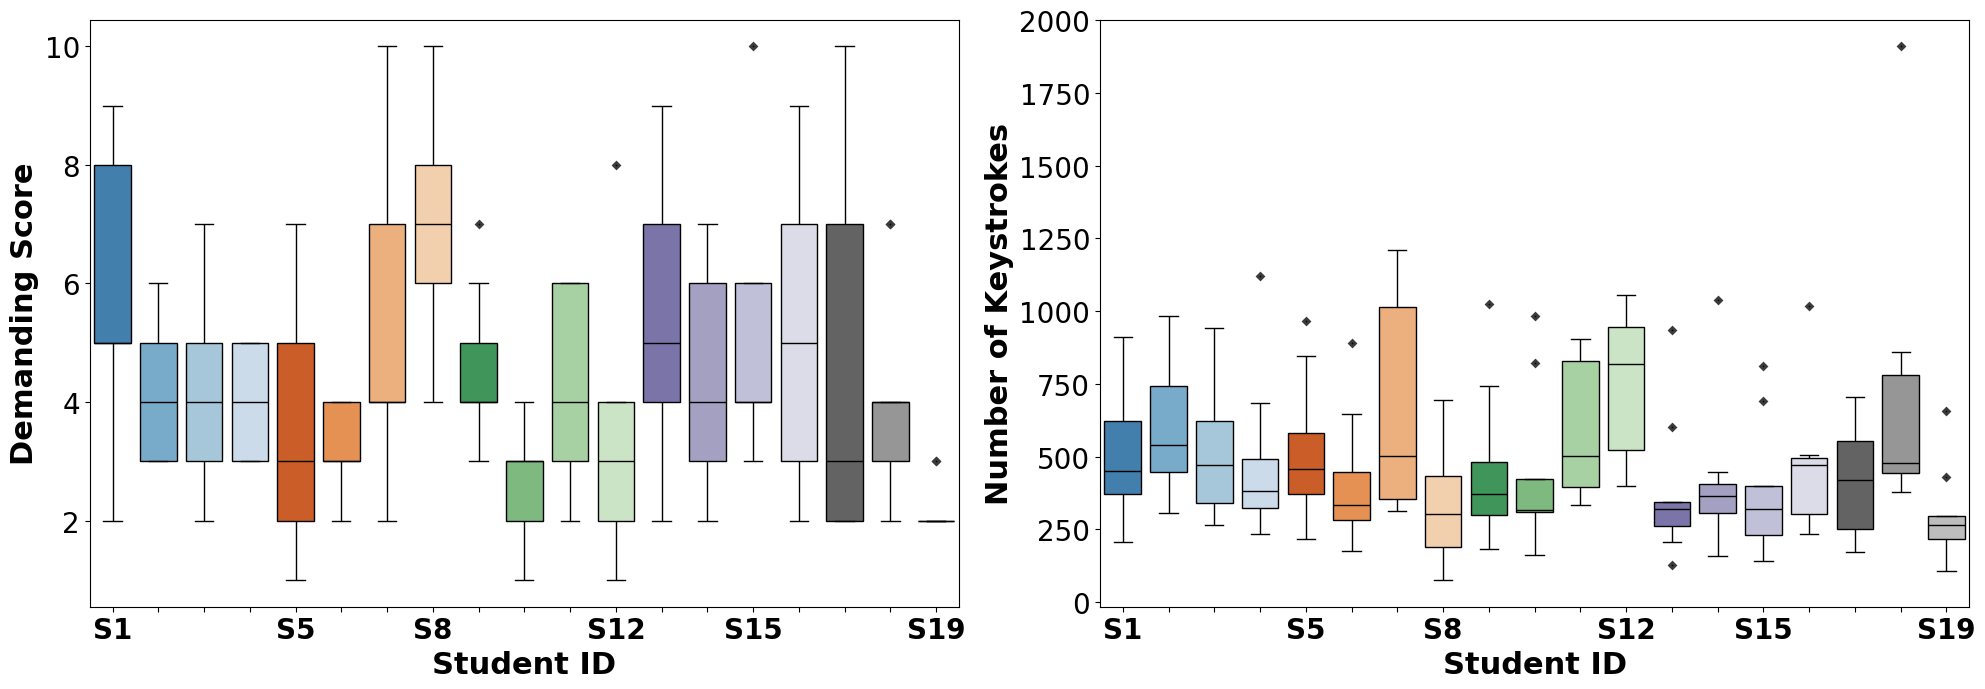

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 7))  # 1 row, 2 columns

# Define student order
student_order = [f"S{i+1}" for i in range(19)]

# Plot 1: Boxplot for "Demanding Score"
sns.boxplot(
    ax=axes[0],
    x='user_id', 
    y='demanding', 
    data=all_features_df, 
    palette='tab20c',
    flierprops=dict(marker='D', markersize=3, markerfacecolor='black', markeredgewidth=2),
    order=student_order,
    boxprops=dict(linewidth=1, edgecolor='black'),
    whiskerprops=dict(linewidth=1, color='black'),
    capprops=dict(linewidth=1, color='black'),
    medianprops=dict(linewidth=1, color='black')
)

axes[0].set_ylabel('Demanding Score', fontsize=22, fontweight='bold')
axes[0].set_xlabel('Student ID', fontsize=22, fontweight='bold')

# Custom x-tick labels: only show for selected students
labels = ['' for _ in range(len(student_order))]
selected_labels = ['S1', 'S5', 'S8', 'S12', 'S15', 'S19']
selected_ticks = [0, 4, 7, 11, 14, 18]

for i, tick in enumerate(selected_ticks):
    labels[tick] = selected_labels[i]

axes[0].set_xticks(np.arange(len(student_order)))
axes[0].set_xticklabels(labels, fontsize=20, fontweight='bold')
axes[0].tick_params(axis='y', labelsize=20)

# Plot 2: Boxplot for "Total Keystrokes"
sns.boxplot(
    ax=axes[1],
    x='user_id', 
    y='total_keystrokes', 
    data=all_features_df, 
    palette='tab20c',
    flierprops=dict(marker='D', markersize=3, markerfacecolor='black', markeredgewidth=2),
    order=student_order,
    boxprops=dict(linewidth=1, edgecolor='black'),
    whiskerprops=dict(linewidth=1, color='black'),
    capprops=dict(linewidth=1, color='black'),
    medianprops=dict(linewidth=1, color='black')
)

axes[1].set_ylabel('Number of Keystrokes', fontsize=22, fontweight='bold')
axes[1].set_xlabel('Student ID', fontsize=22, fontweight='bold')

# Apply the same custom x-tick labels
axes[1].set_xticks(np.arange(len(student_order)))
axes[1].set_xticklabels(labels, fontsize=20, fontweight='bold')
axes[1].tick_params(axis='y', labelsize=20)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('./plot_eps/Student_Keystrokes_and_Demanding_Scores.eps', format='eps') 

# Show the plot
plt.show()


/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/2598072744.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,0], x='user_id', y='demanding', data=all_features_df,
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/2598072744.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,1], x='user_id', y='total_keystrokes', data=all_features_df,
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/2598072744.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1,0], x='exercise_id

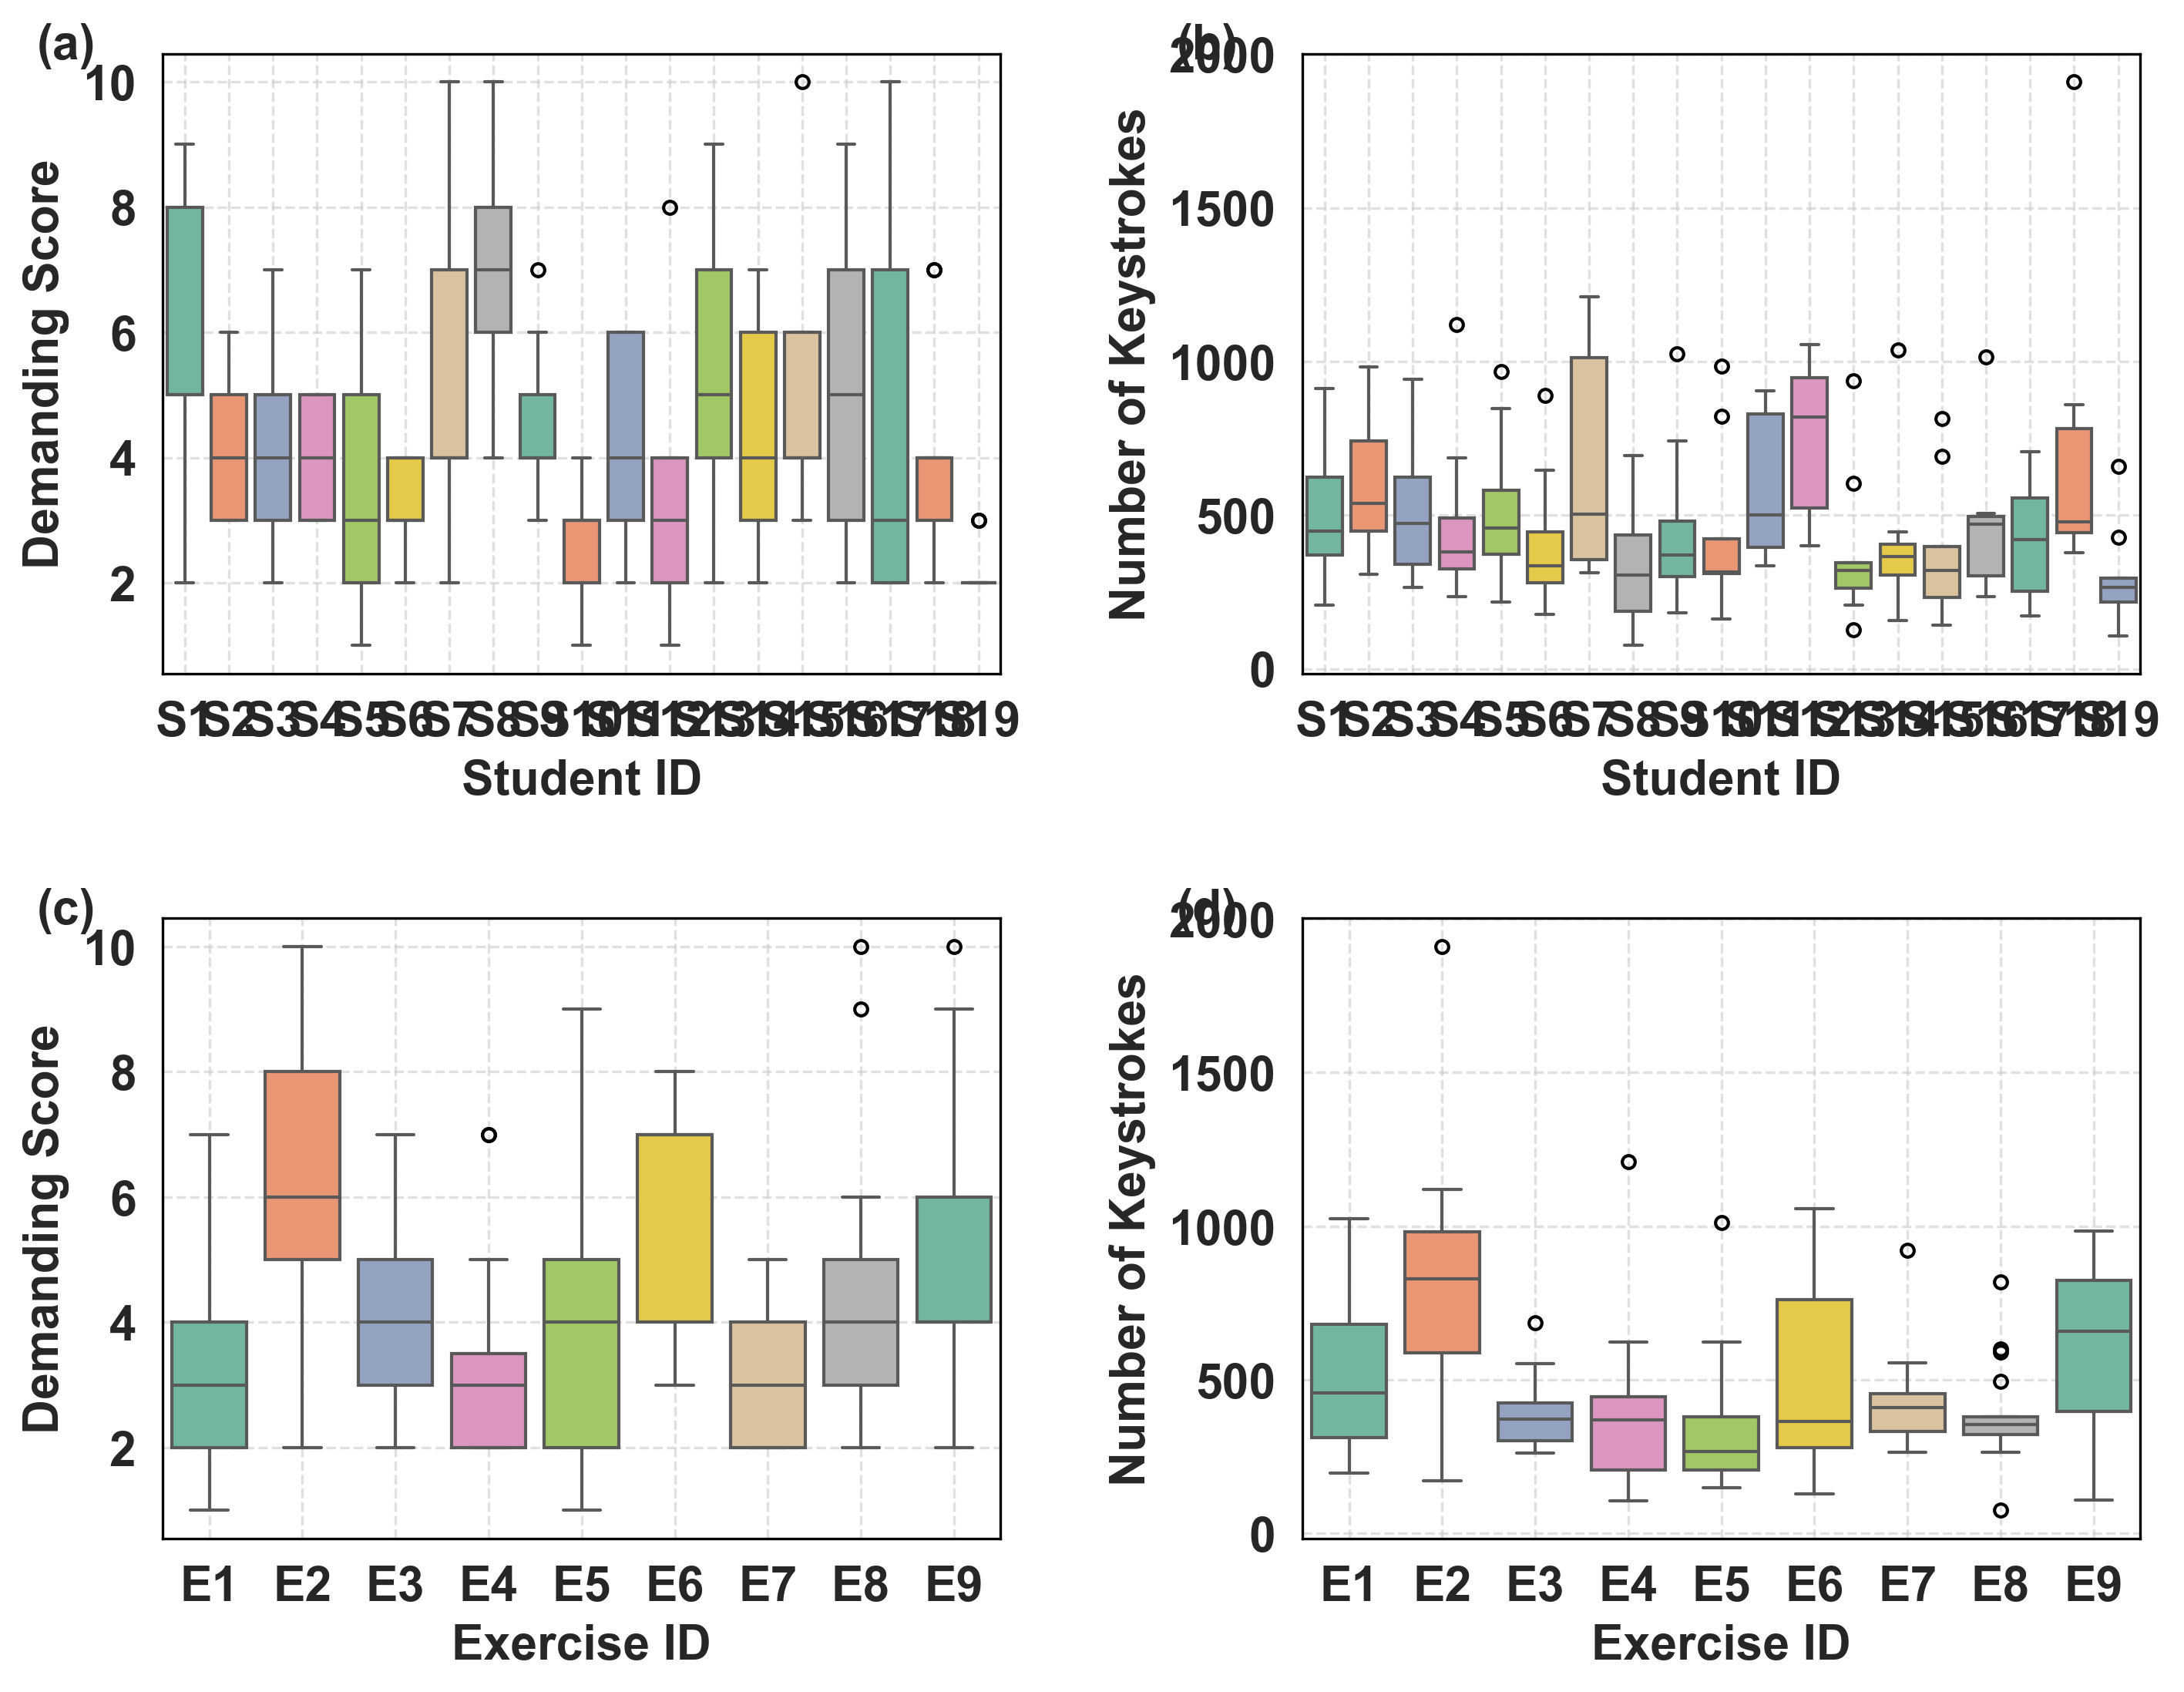

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up IEEE-compatible style
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("paper", font_scale=1.1)
sns.set_palette("Set2")  # Using colorblind-friendly palette

plt.rcParams.update({
    'font.size': 25,
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'figure.dpi': 300,
    'axes.edgecolor': 'black',
    'axes.linewidth': 0.8
})

# Create figure with adjusted proportions
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Formatting function
def format_ax(ax, ylabel, xlabel, subplot_label):
    ax.set_facecolor('white')
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel(xlabel, fontsize=15, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=15, fontweight='bold')
    
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.text(-0.15, 1.05, subplot_label, transform=ax.transAxes,
            fontsize=15, fontweight='bold', va='top')
    
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(0.8)

# Demand Scores Plot
sns.boxplot(ax=axes[0,0], x='user_id', y='demanding', data=all_features_df,
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),
            palette="Set2")
format_ax(axes[0,0], 'Demanding Score', 'Student ID', '(a)')

# Keystroke Count Plot
sns.boxplot(ax=axes[0,1], x='user_id', y='total_keystrokes', data=all_features_df,
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),
            palette="Set2")
format_ax(axes[0,1], 'Number of Keystrokes', 'Student ID', '(b)')

# Exercise Demand Scores Plot
sns.boxplot(ax=axes[1,0], x='exercise_id', y='demanding', data=all_features_df,
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),
            palette="Set2")
format_ax(axes[1,0], 'Demanding Score', 'Exercise ID', '(c)')

# Exercise Keystroke Count Plot
sns.boxplot(ax=axes[1,1], x='exercise_id', y='total_keystrokes', data=all_features_df,
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),
            palette="Set2")
format_ax(axes[1,1], 'Number of Keystrokes', 'Exercise ID', '(d)')

# Final adjustments
plt.tight_layout()
plt.subplots_adjust(top=0.92)

plt.savefig('./plot_eps/student_exercise_plots.pdf', bbox_inches='tight')
plt.show()


/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/1928083817.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


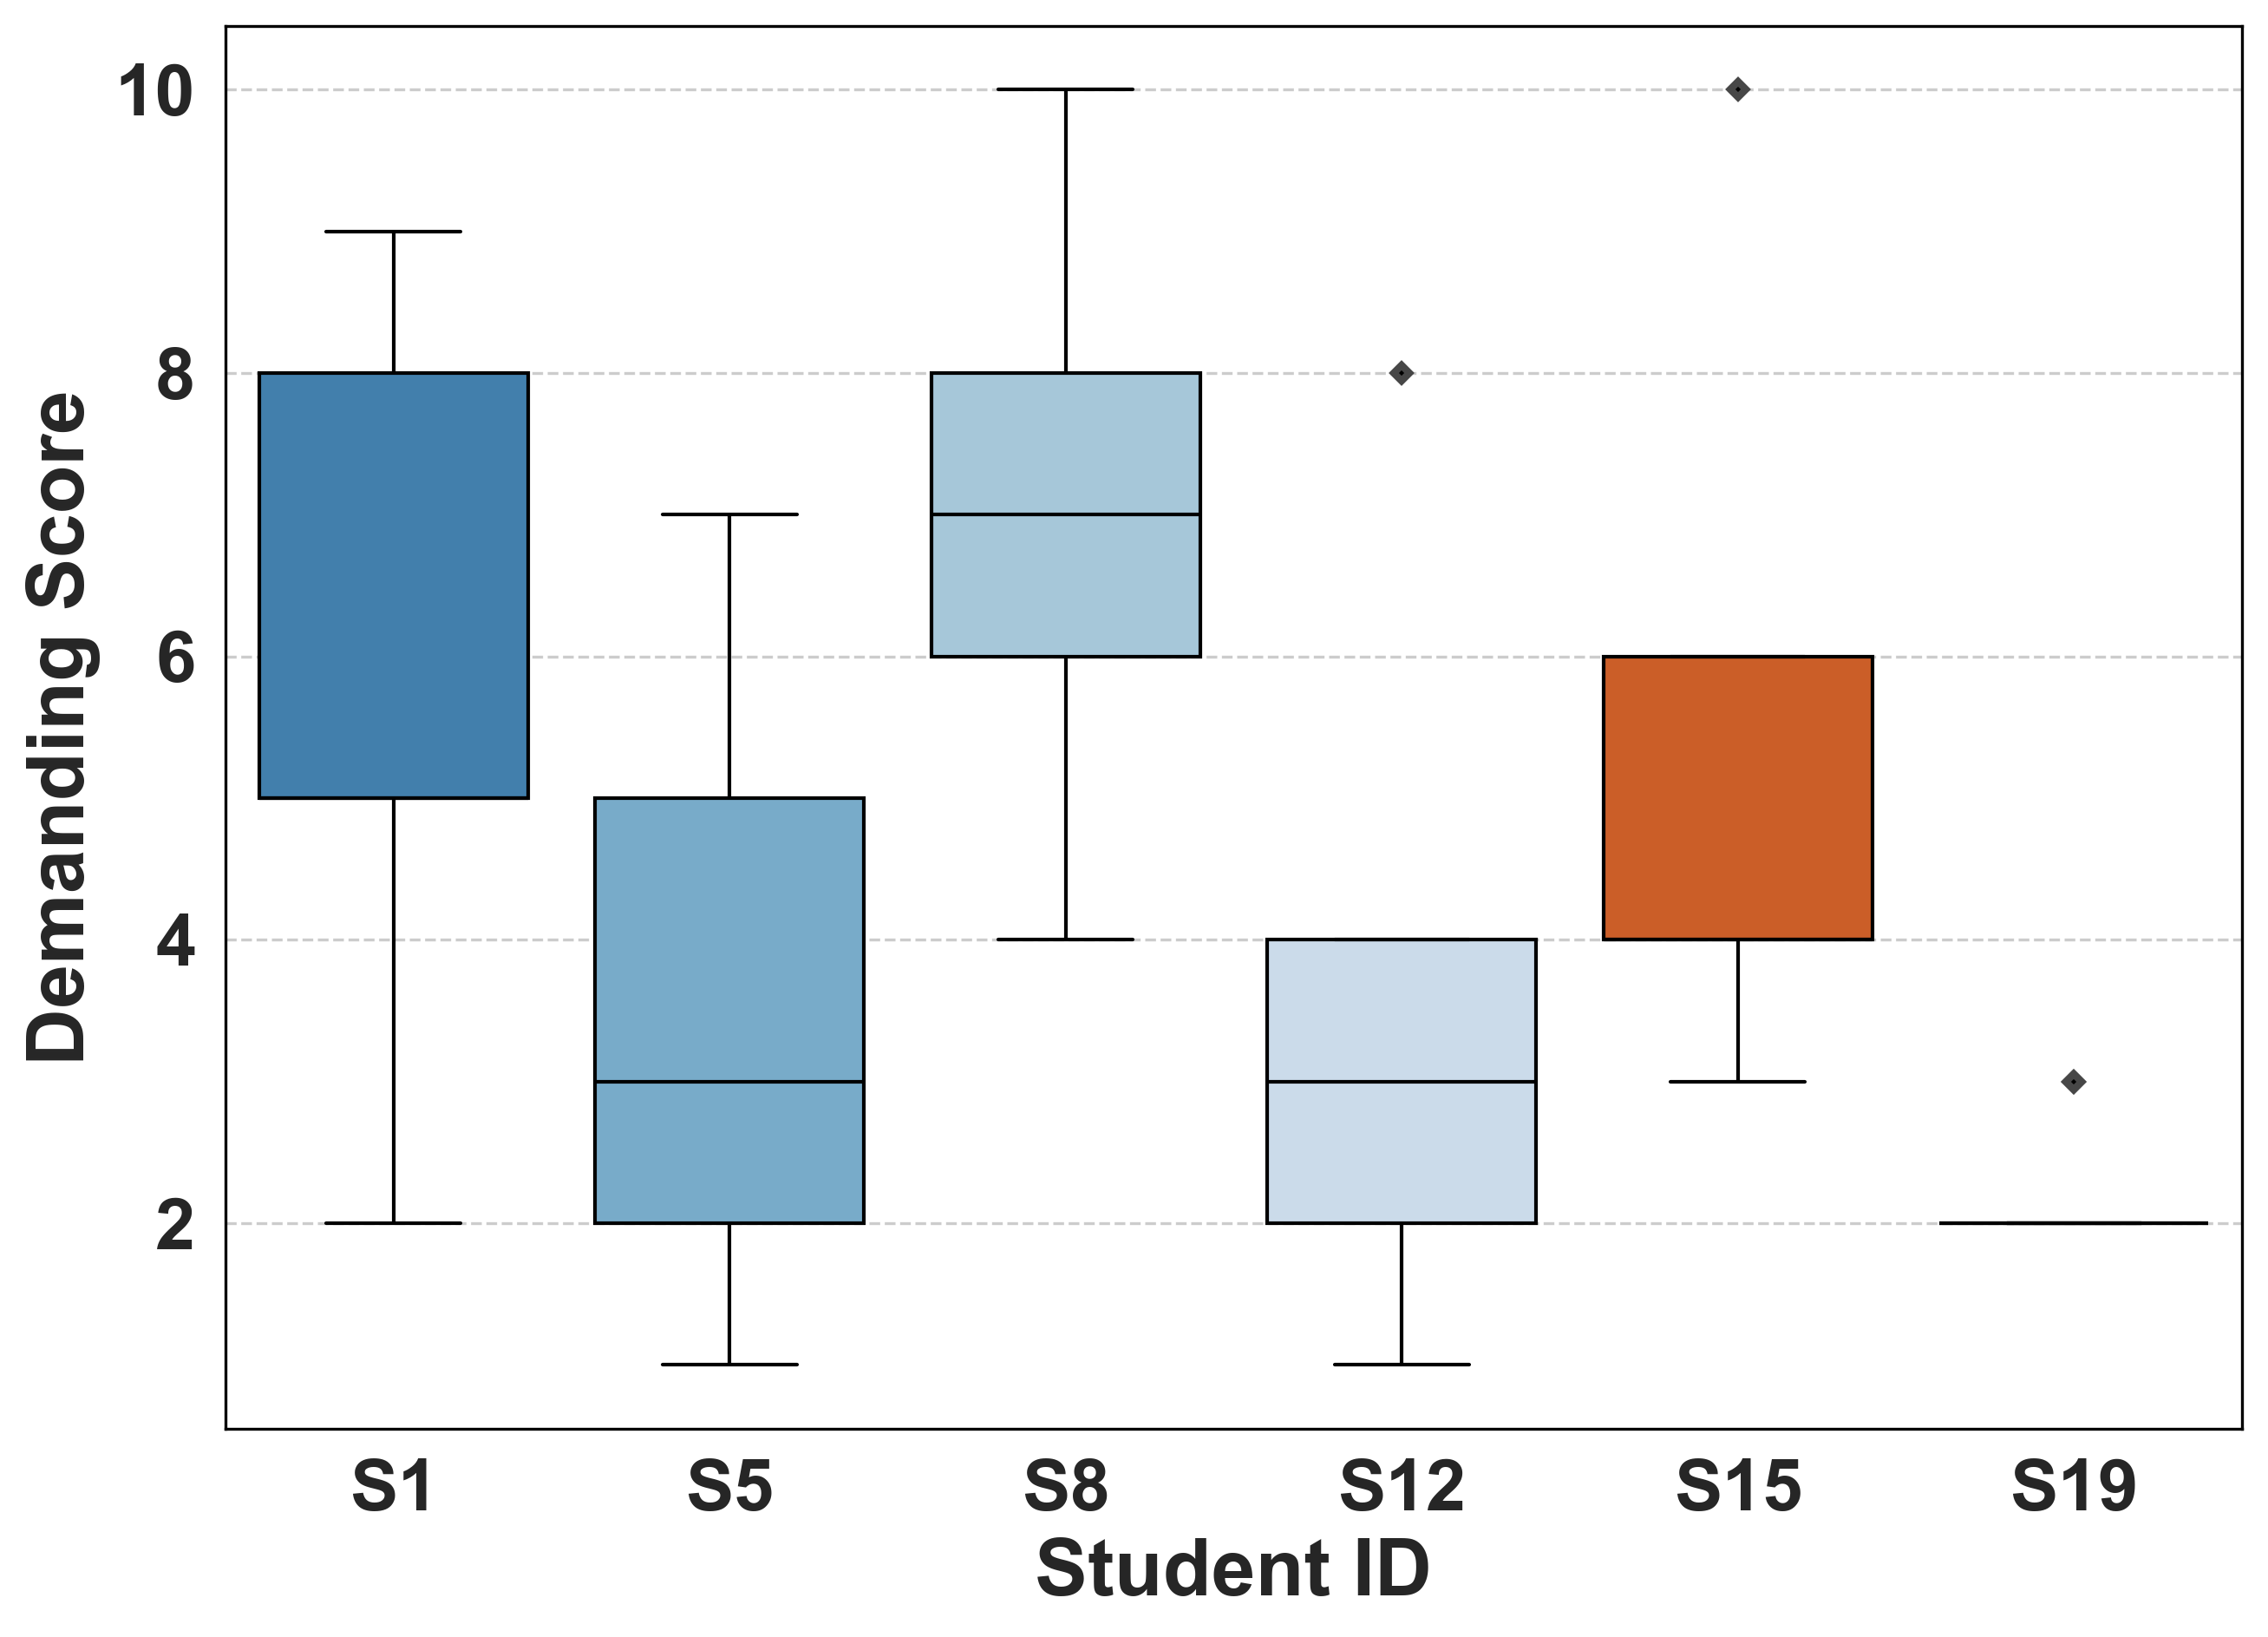

/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/1928083817.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


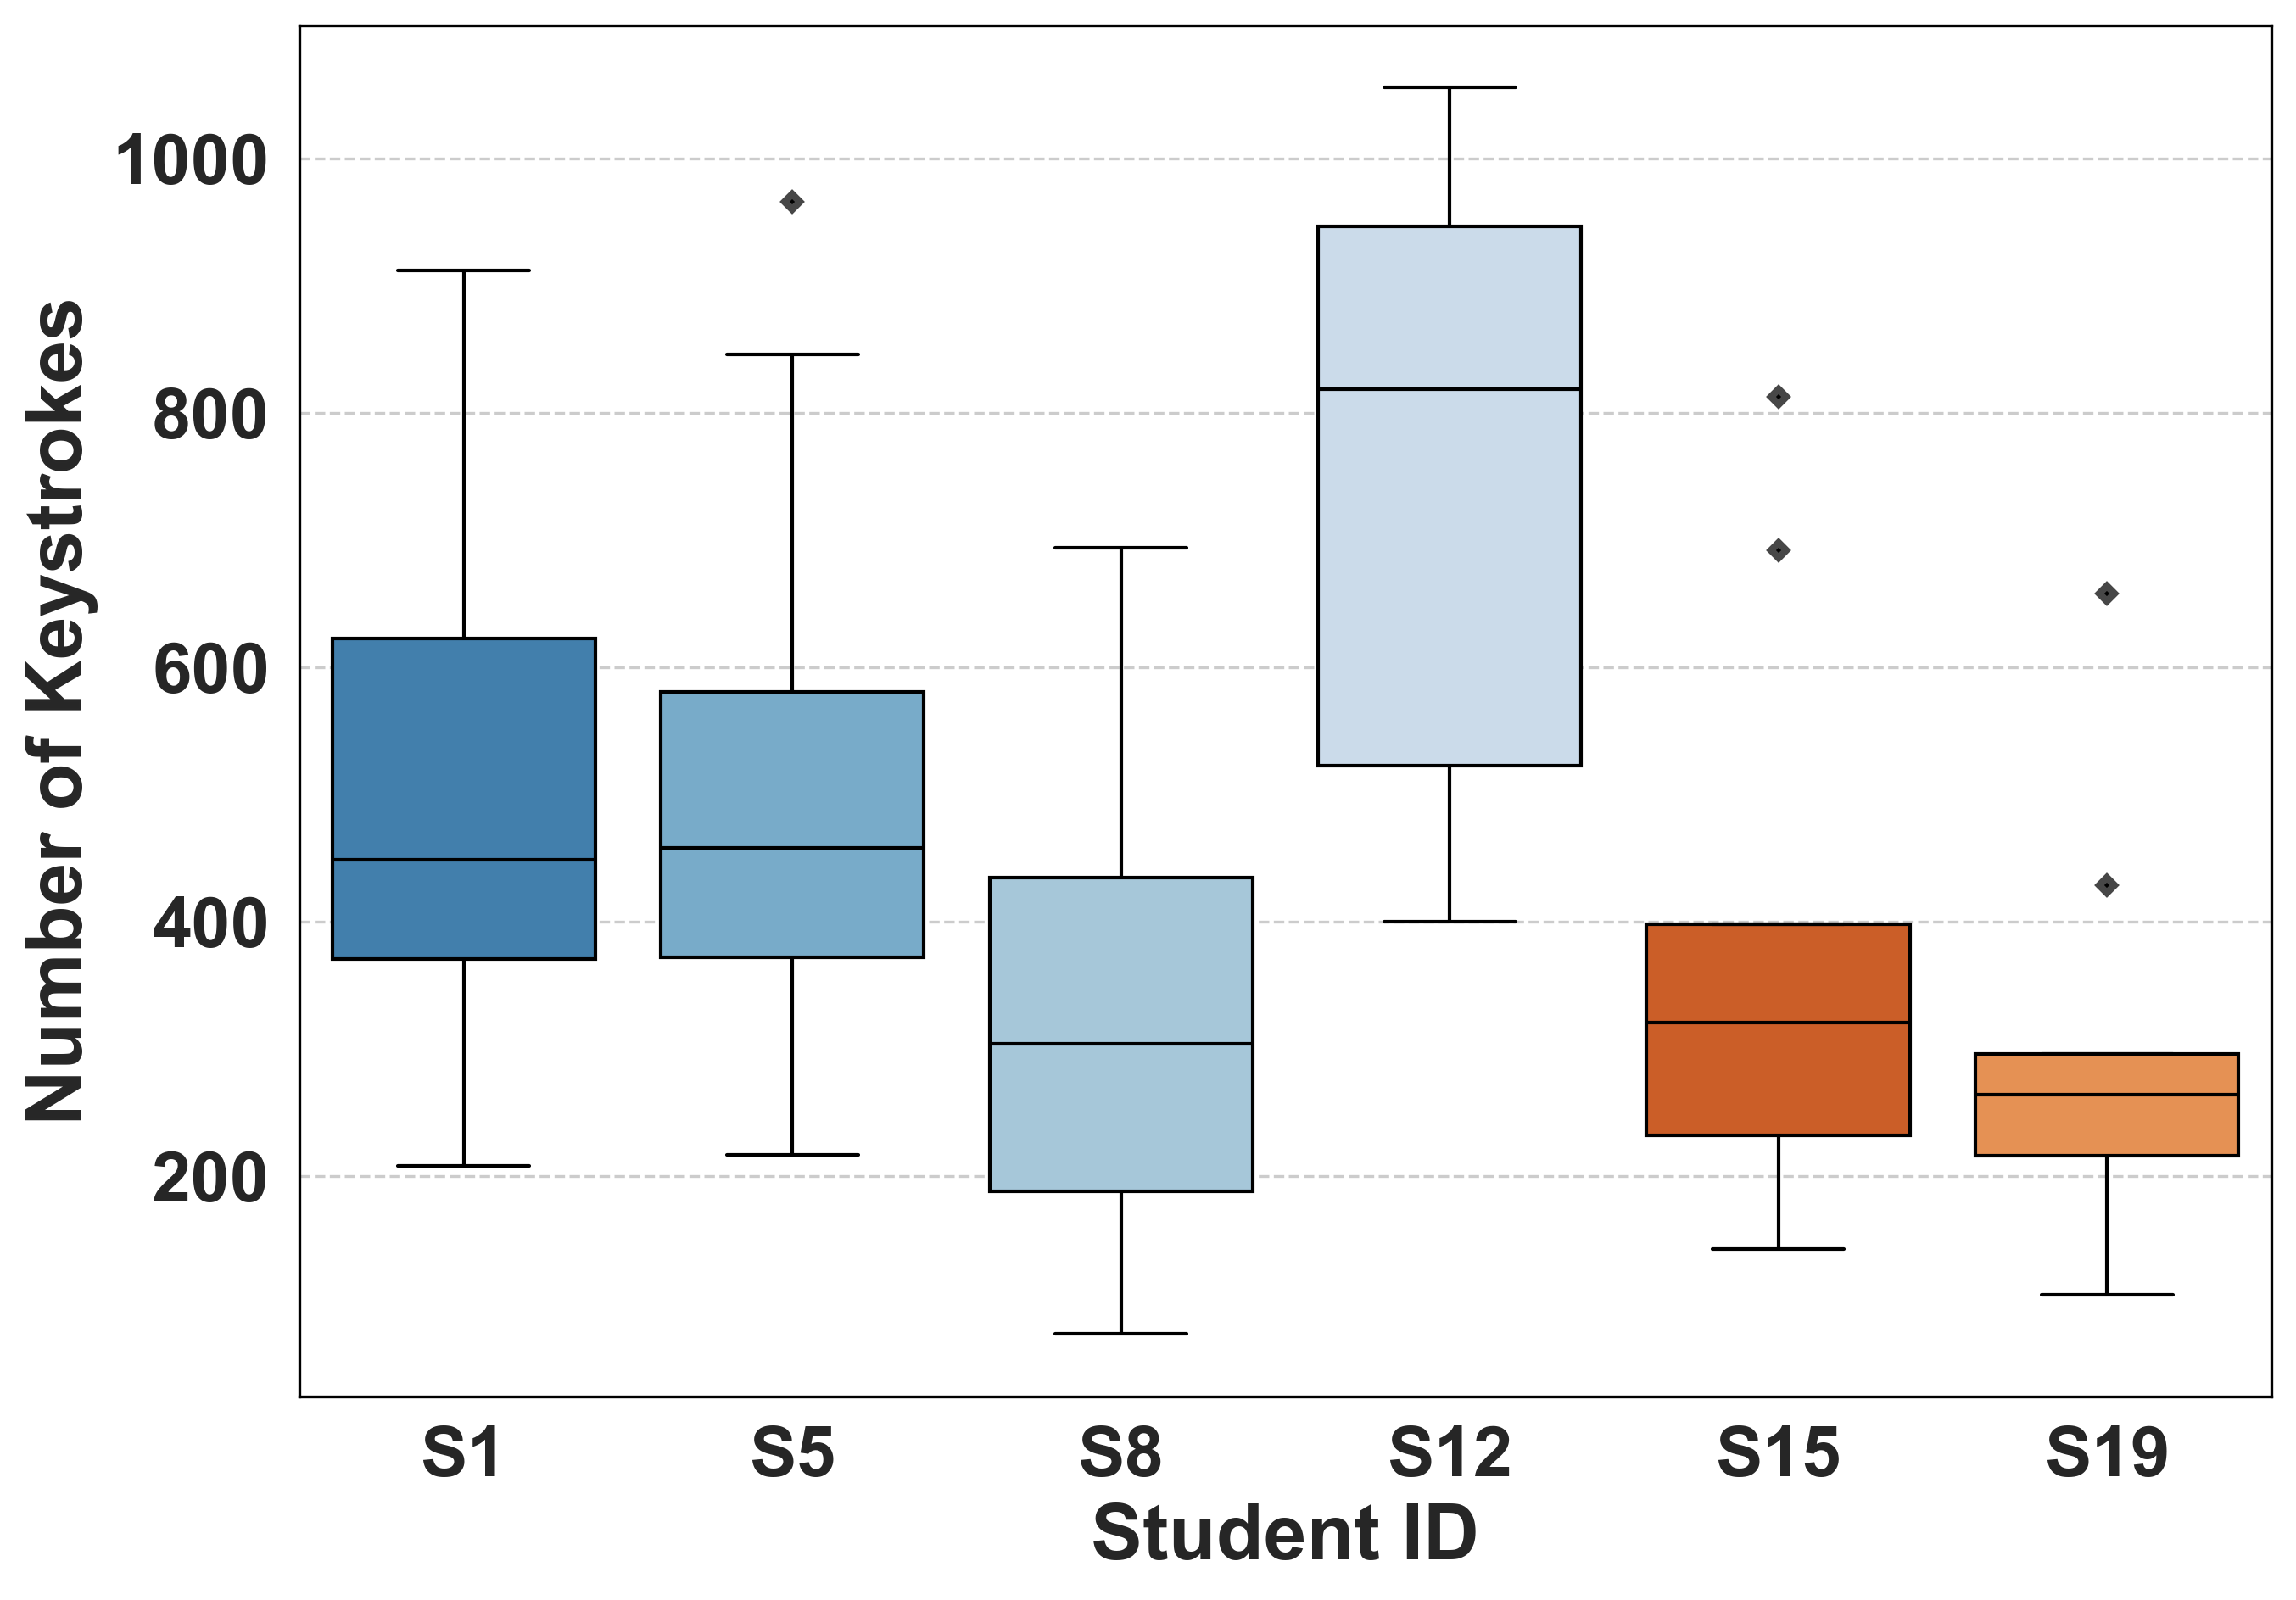

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define selected user IDs
selected_users = ['S1', 'S5', 'S8', 'S12', 'S15', 'S19']

# Filter dataset to only include selected users
filtered_df = all_features_df[all_features_df['user_id'].isin(selected_users)]

# Order the x-axis based on selected users
user_order = selected_users

plt.figure(figsize=(10, 7))

# Plot demanding scores for selected users
sns.boxplot(
    x='user_id', 
    y='demanding', 
    data=filtered_df, 
    palette='tab20c',
    flierprops=dict(marker='D', markersize=3, markerfacecolor='black', markeredgewidth=2),  
    order=user_order,  # Use only selected users
    boxprops=dict(linewidth=1, edgecolor='black'),  
    whiskerprops=dict(linewidth=1, color='black'),  
    capprops=dict(linewidth=1, color='black'),  
    medianprops=dict(linewidth=1, color='black')  
)

# Set labels and formatting
plt.ylabel('Demanding Score', fontsize=22, fontweight='bold')
plt.xlabel('Student ID', fontsize=22, fontweight='bold')  
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

plt.savefig('./plot_eps/Filtered_Student_Demanding_Scores.eps', format='eps') 
plt.show()

# Repeat the process for total keystrokes
plt.figure(figsize=(10, 7))

sns.boxplot(
    x='user_id', 
    y='total_keystrokes', 
    data=filtered_df, 
    palette='tab20c',
    flierprops=dict(marker='D', markersize=3, markerfacecolor='black', markeredgewidth=2),  
    order=user_order,  # Use only selected users
    boxprops=dict(linewidth=1, edgecolor='black'),  
    whiskerprops=dict(linewidth=1, color='black'),  
    capprops=dict(linewidth=1, color='black'),  
    medianprops=dict(linewidth=1, color='black')  
)

# Set labels and formatting
plt.ylabel('Number of Keystrokes', fontsize=22, fontweight='bold')
plt.xlabel('Student ID', fontsize=22, fontweight='bold')  
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

plt.savefig('./plot_eps/Filtered_Student_Keystrokes_Count.eps', format='eps') 
plt.show()


/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/1103928074.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,0], x='user_id', y='demanding', data=filtered_df,
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/1103928074.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,1], x='user_id', y='total_keystrokes', data=filtered_df,
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/1103928074.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1,0], x='exercise_id', y='de

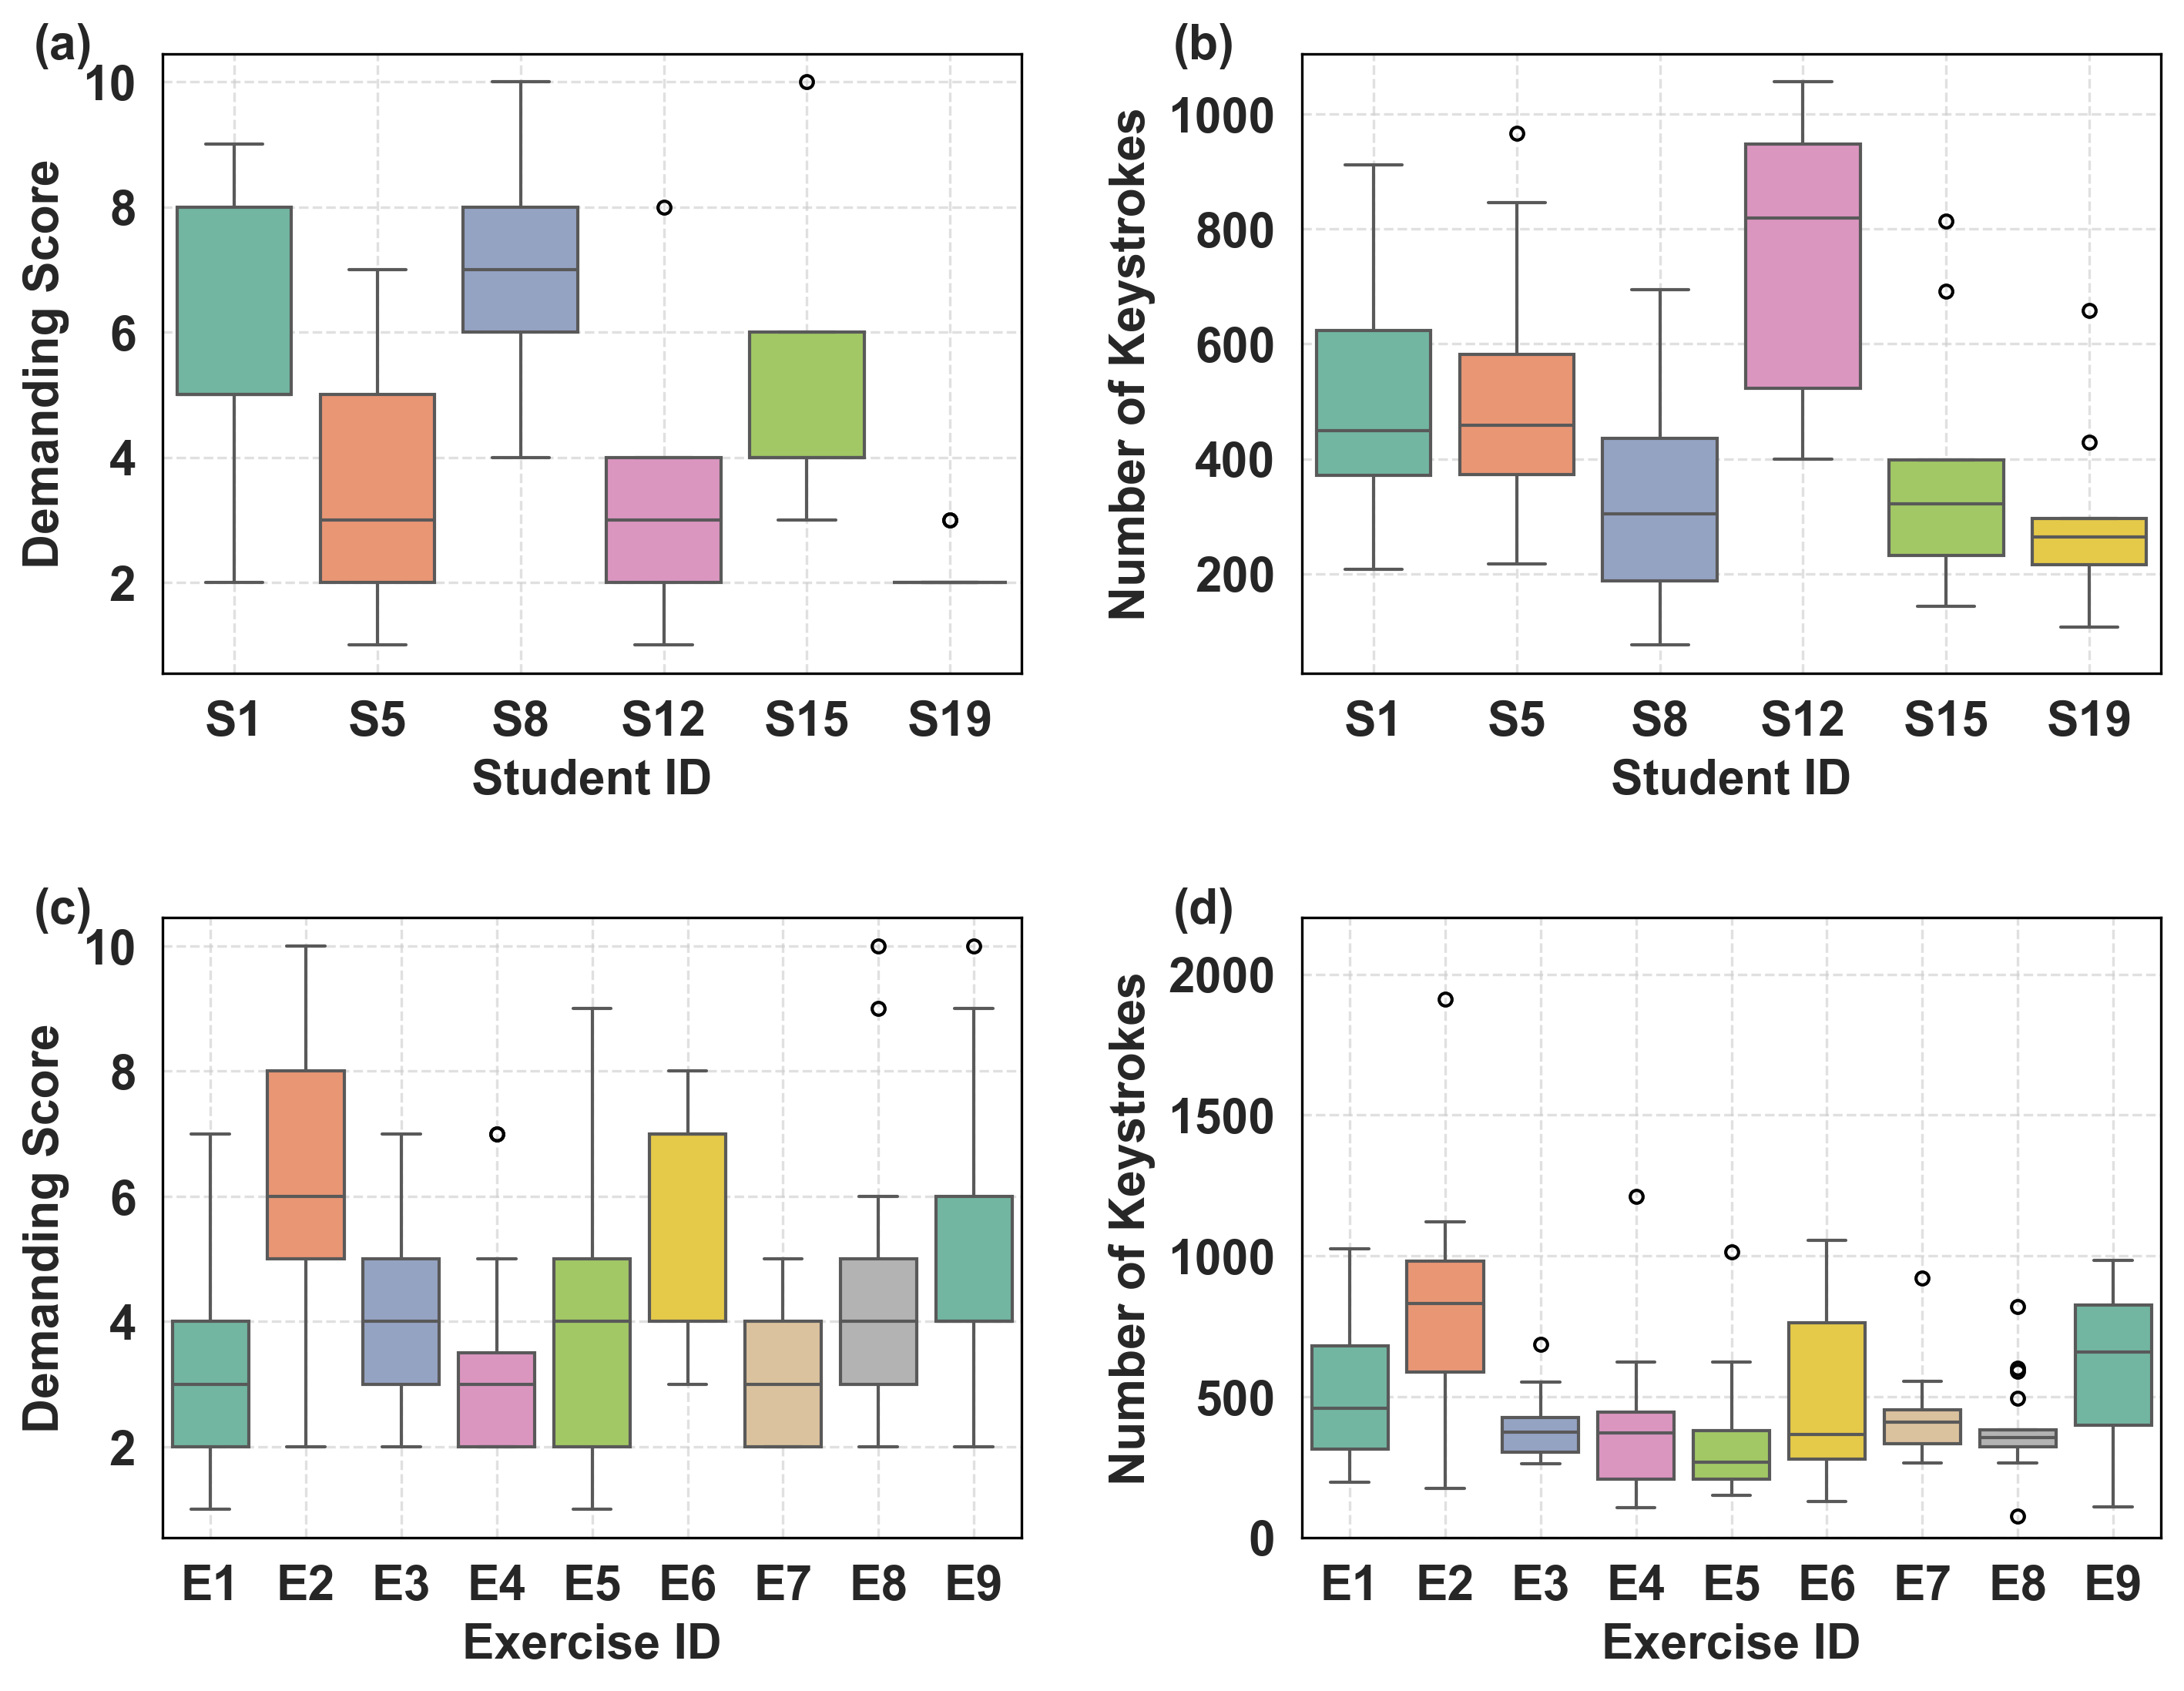

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  

# Set up IEEE-compatible style  
sns.set_style("whitegrid", {'grid.linestyle': '--'})  
sns.set_context("paper", font_scale=1.1)  
sns.set_palette("Set2")  # Using a colorblind-friendly palette  

plt.rcParams.update({  
    'font.size': 25,  
    'font.weight': 'bold',  
    'axes.labelweight': 'bold',  
    'axes.titleweight': 'bold',  
    'figure.dpi': 300,  
    'axes.edgecolor': 'black',  
    'axes.linewidth': 0.8  
})  

# Define selected user IDs  
selected_users = ['S1', 'S5', 'S8', 'S12', 'S15', 'S19']  

# Filter dataset for first two plots  
filtered_df = all_features_df[all_features_df['user_id'].isin(selected_users)]  

# Create figure with adjusted proportions  
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  

# Formatting function  
def format_ax(ax, ylabel, xlabel, subplot_label):  
    ax.set_facecolor('white')  
    ax.tick_params(axis='both', which='major', labelsize=15)  
    ax.set_xlabel(xlabel, fontsize=15, fontweight='bold')  
    ax.set_ylabel(ylabel, fontsize=15, fontweight='bold')  
    ax.grid(True, linestyle='--', alpha=0.6)  
    ax.text(-0.15, 1.05, subplot_label, transform=ax.transAxes,  
            fontsize=15, fontweight='bold', va='top')  
    for spine in ax.spines.values():  
        spine.set_color('black')  
        spine.set_linewidth(0.8)  

# Demand Scores Plot (Filtered Users)  
sns.boxplot(ax=axes[0,0], x='user_id', y='demanding', data=filtered_df,  
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),  
            palette="Set2", order=selected_users)  
format_ax(axes[0,0], 'Demanding Score', 'Student ID', '(a)')  

# Keystroke Count Plot (Filtered Users)  
sns.boxplot(ax=axes[0,1], x='user_id', y='total_keystrokes', data=filtered_df,  
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),  
            palette="Set2", order=selected_users)  
format_ax(axes[0,1], 'Number of Keystrokes', 'Student ID', '(b)')  

# Exercise Demand Scores Plot (Unfiltered)  
sns.boxplot(ax=axes[1,0], x='exercise_id', y='demanding', data=all_features_df,  
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),  
            palette="Set2")  
format_ax(axes[1,0], 'Demanding Score', 'Exercise ID', '(c)')  

# Exercise Keystroke Count Plot (Unfiltered)  
sns.boxplot(ax=axes[1,1], x='exercise_id', y='total_keystrokes', data=all_features_df,  
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),  
            palette="Set2")
axes[1,1].set_ylim(0, 2200)  
format_ax(axes[1,1], 'Number of Keystrokes', 'Exercise ID', '(d)')  

# Final adjustments  
plt.tight_layout()  
plt.subplots_adjust(top=0.92)  

plt.savefig('./plot_eps/student_exercise_plots.pdf', bbox_inches='tight')  
plt.show()  


/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/1539944524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,0], x='user_id', y='demanding', data=all_features_df,
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/1539944524.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,1], x='user_id', y='total_keystrokes', data=all_features_df,
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/1539944524.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1,0], x='exercise_id

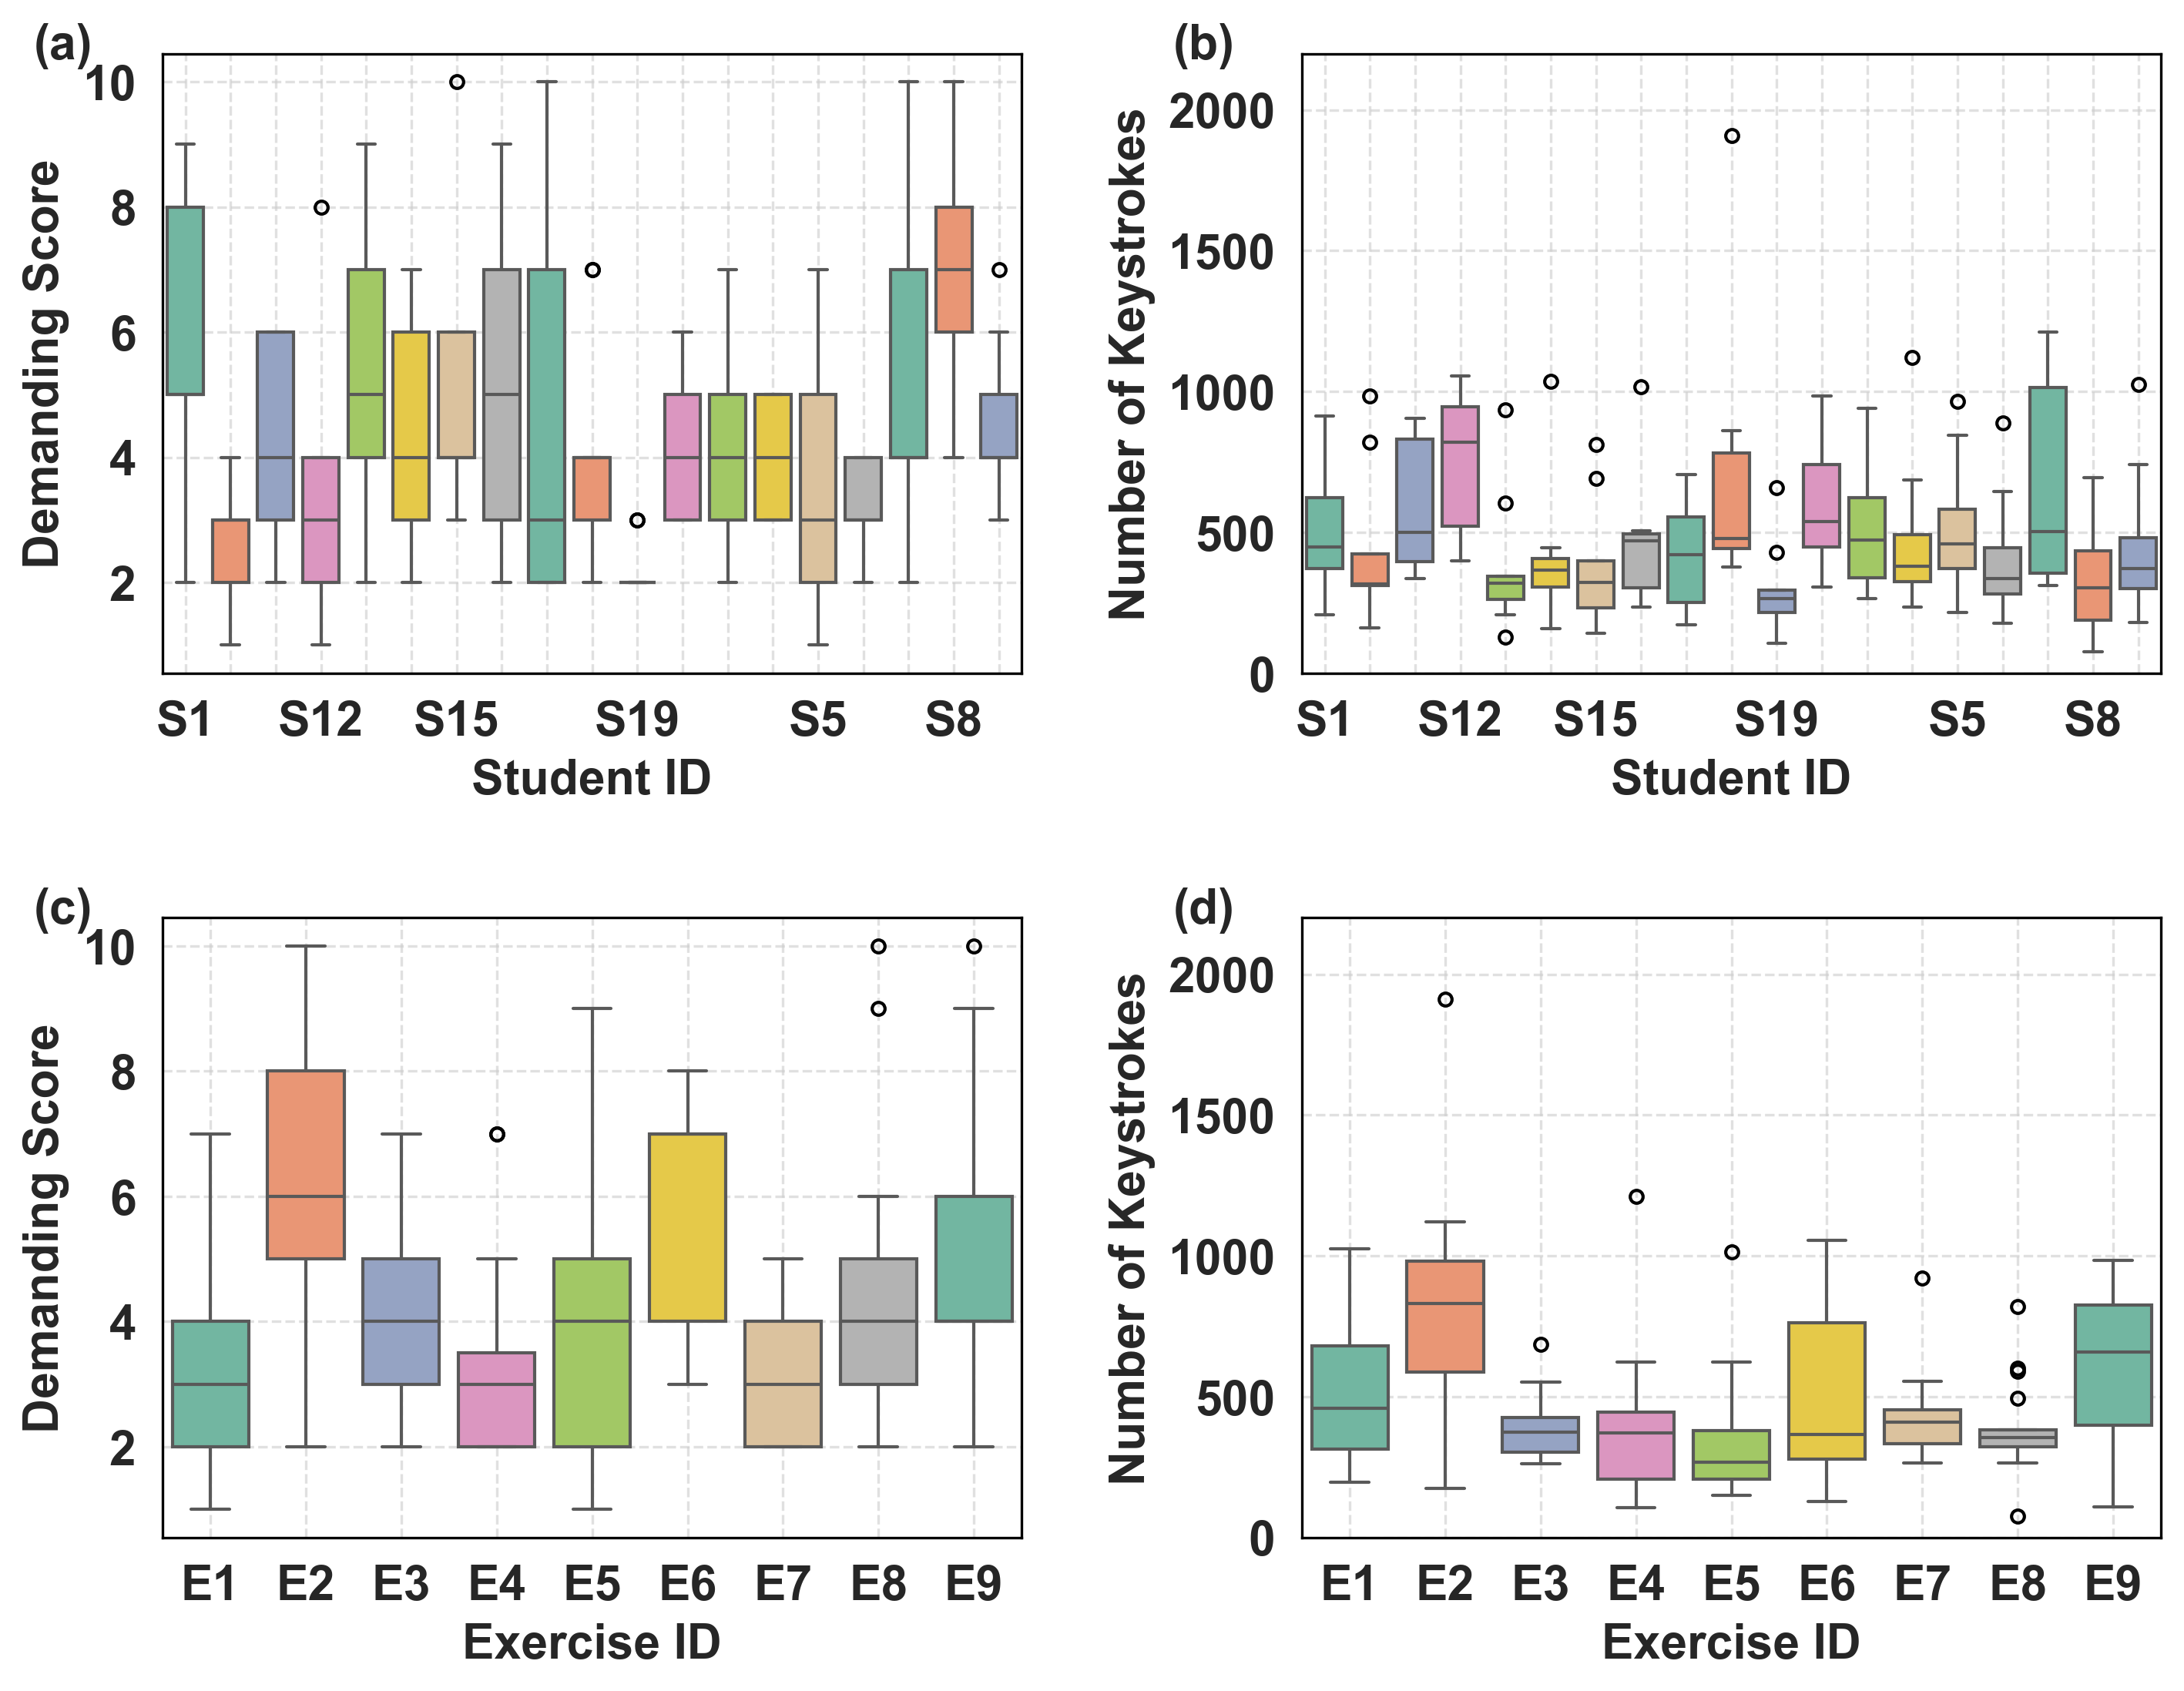

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  

# Set up IEEE-compatible style  
sns.set_style("whitegrid", {'grid.linestyle': '--'})  
sns.set_context("paper", font_scale=1.1)  
sns.set_palette("Set2")  # Using a colorblind-friendly palette  

plt.rcParams.update({  
    'font.size': 25,  
    'font.weight': 'bold',  
    'axes.labelweight': 'bold',  
    'axes.titleweight': 'bold',  
    'figure.dpi': 300,  
    'axes.edgecolor': 'black',  
    'axes.linewidth': 0.8  
})  

# Define selected user IDs for labeling  
selected_users = ['S1', 'S5', 'S8', 'S12', 'S15', 'S19']  

# Get all unique user IDs in sorted order (assuming categorical order is important)
user_order = sorted(all_features_df['user_id'].unique())

# Create figure with adjusted proportions  
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  

# Formatting function  
def format_ax(ax, ylabel, xlabel, subplot_label):  
    ax.set_facecolor('white')  
    ax.tick_params(axis='both', which='major', labelsize=15)  
    ax.set_xlabel(xlabel, fontsize=15, fontweight='bold')  
    ax.set_ylabel(ylabel, fontsize=15, fontweight='bold')  
    ax.grid(True, linestyle='--', alpha=0.6)  
    ax.text(-0.15, 1.05, subplot_label, transform=ax.transAxes,  
            fontsize=15, fontweight='bold', va='top')  
    for spine in ax.spines.values():  
        spine.set_color('black')  
        spine.set_linewidth(0.8)  

# Demand Scores Plot (All Users, Limited Labels)  
sns.boxplot(ax=axes[0,0], x='user_id', y='demanding', data=all_features_df,  
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),  
            palette="Set2", order=user_order)  

# Modify x-tick labels to only show selected users  
axes[0,0].set_xticks(range(len(user_order)))  
axes[0,0].set_xticklabels([uid if uid in selected_users else '' for uid in user_order])

format_ax(axes[0,0], 'Demanding Score', 'Student ID', '(a)')  

# Keystroke Count Plot (All Users, Limited Labels)  
sns.boxplot(ax=axes[0,1], x='user_id', y='total_keystrokes', data=all_features_df,  
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),  
            palette="Set2", order=user_order)  

# Modify x-tick labels to only show selected users  
axes[0,1].set_xticks(range(len(user_order)))  
axes[0,1].set_xticklabels([uid if uid in selected_users else '' for uid in user_order])
axes[0,1].set_ylim(0, 2200)
format_ax(axes[0,1], 'Number of Keystrokes', 'Student ID', '(b)')  

# Exercise Demand Scores Plot (Unfiltered)  
sns.boxplot(ax=axes[1,0], x='exercise_id', y='demanding', data=all_features_df,  
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),  
            palette="Set2")  
format_ax(axes[1,0], 'Demanding Score', 'Exercise ID', '(c)')  

# Exercise Keystroke Count Plot (Unfiltered)  
sns.boxplot(ax=axes[1,1], x='exercise_id', y='total_keystrokes', data=all_features_df,  
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),  
            palette="Set2")
axes[1,1].set_ylim(0, 2200)  
format_ax(axes[1,1], 'Number of Keystrokes', 'Exercise ID', '(d)')  

# Final adjustments  
plt.tight_layout()  
plt.subplots_adjust(top=0.92)  

plt.savefig('./plot_eps/demanding_and_keystrokes.pdf', bbox_inches='tight')  
plt.show()


/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/1176372895.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,0], x='user_id', y='demanding', data=all_features_df,
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/1176372895.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,1], x='user_id', y='total_keystrokes', data=all_features_df,
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_5024/1176372895.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1,0], x='exercise_id

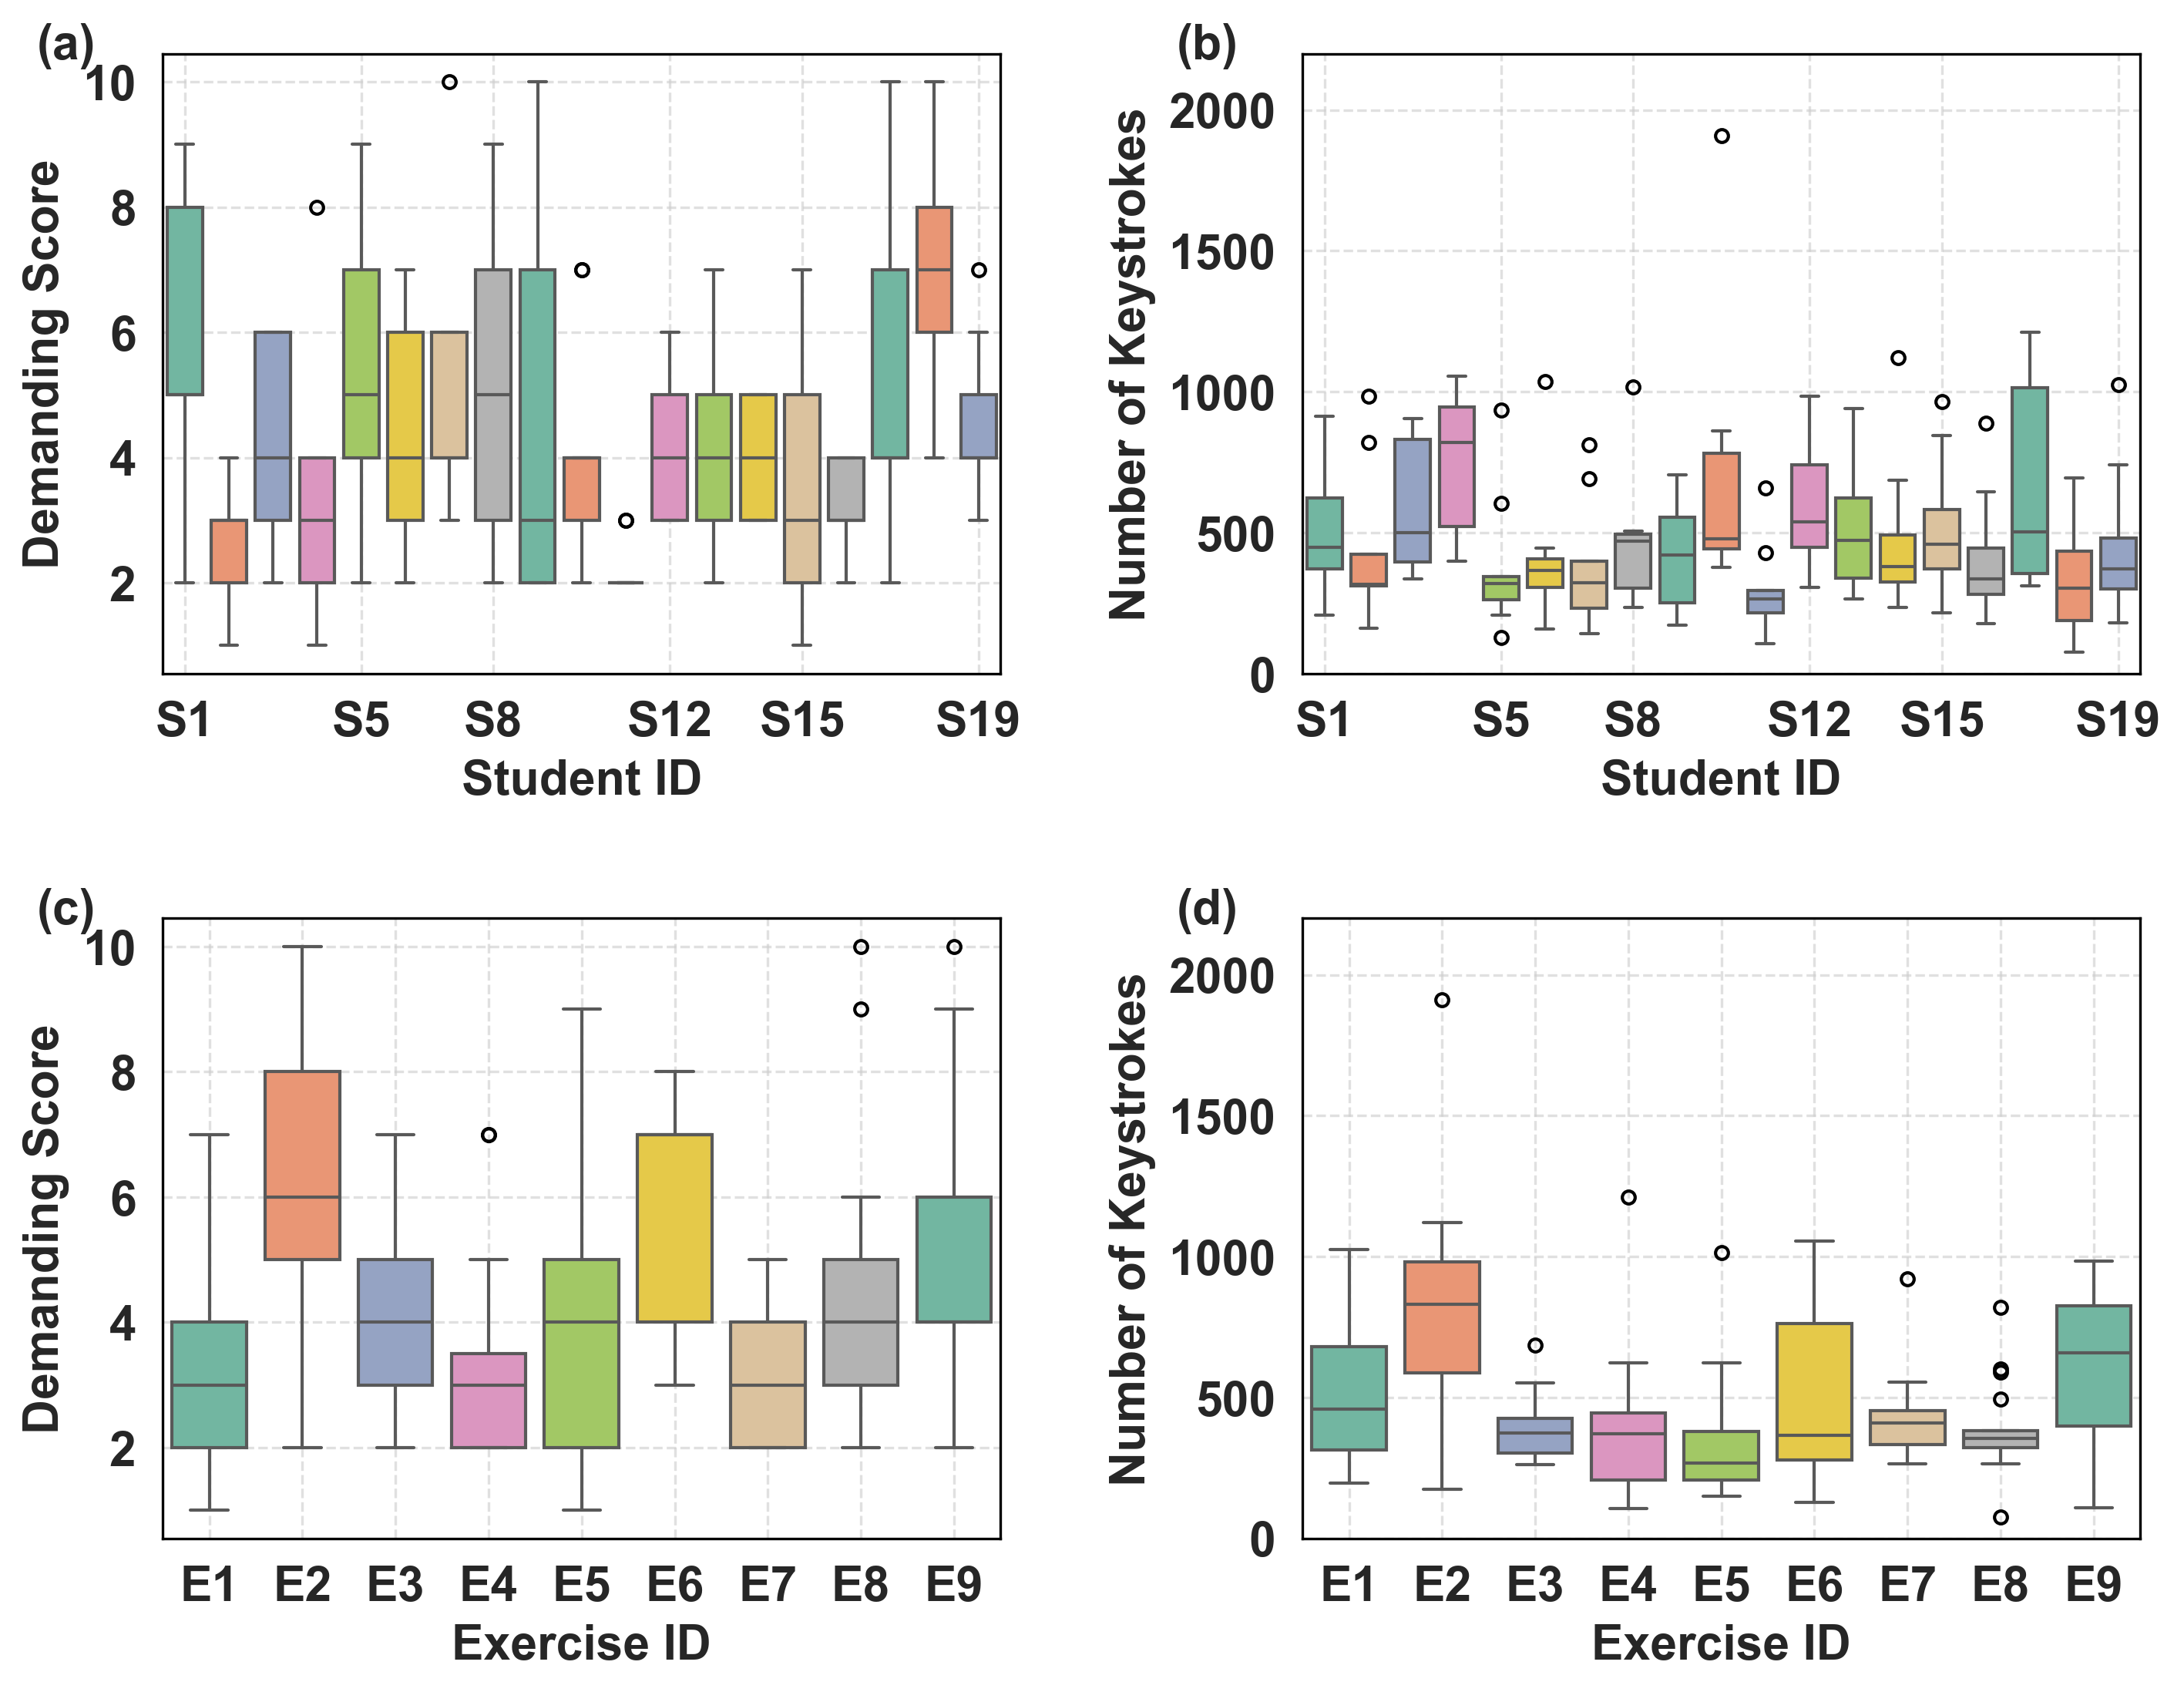

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  

# Set up IEEE-compatible style  
sns.set_style("whitegrid", {'grid.linestyle': '--'})  
sns.set_context("paper", font_scale=1.1)  
sns.set_palette("Set2")  # Using a colorblind-friendly palette  

plt.rcParams.update({  
    'font.size': 25,  
    'font.weight': 'bold',  
    'axes.labelweight': 'bold',  
    'axes.titleweight': 'bold',  
    'figure.dpi': 300,  
    'axes.edgecolor': 'black',  
    'axes.linewidth': 0.8  
})  

# Define selected user IDs for labeling  
selected_labels = ['S1', 'S5', 'S8', 'S12', 'S15', 'S19']
selected_ticks = [0, 4, 7, 11, 14, 18]

# Get all unique user IDs in sorted order (assuming categorical order is important)
user_order = sorted(all_features_df['user_id'].unique())

# Create figure with adjusted proportions  
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  

# Formatting function  
def format_ax(ax, ylabel, xlabel, subplot_label):  
    ax.set_facecolor('white')  
    ax.tick_params(axis='both', which='major', labelsize=15)  
    ax.set_xlabel(xlabel, fontsize=15, fontweight='bold')  
    ax.set_ylabel(ylabel, fontsize=15, fontweight='bold')  
    ax.grid(True, linestyle='--', alpha=0.6)  
    ax.text(-0.15, 1.05, subplot_label, transform=ax.transAxes,  
            fontsize=15, fontweight='bold', va='top')  
    for spine in ax.spines.values():  
        spine.set_color('black')  
        spine.set_linewidth(0.8)  

# Demand Scores Plot (All Users, Limited Labels)  
sns.boxplot(ax=axes[0,0], x='user_id', y='demanding', data=all_features_df,  
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),  
            palette="Set2", order=user_order)  

# Set x-ticks and labels only for selected positions  
axes[0,0].set_xticks(selected_ticks)  
axes[0,0].set_xticklabels(selected_labels)

format_ax(axes[0,0], 'Demanding Score', 'Student ID', '(a)')  

# Keystroke Count Plot (All Users, Limited Labels)  
sns.boxplot(ax=axes[0,1], x='user_id', y='total_keystrokes', data=all_features_df,  
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),  
            palette="Set2", order=user_order)  

# Set x-ticks and labels only for selected positions  
axes[0,1].set_xticks(selected_ticks)  
axes[0,1].set_xticklabels(selected_labels)
axes[0,1].set_ylim(0, 2200) 
format_ax(axes[0,1], 'Number of Keystrokes', 'Student ID', '(b)')  

# Exercise Demand Scores Plot (Unfiltered)  
sns.boxplot(ax=axes[1,0], x='exercise_id', y='demanding', data=all_features_df,  
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),  
            palette="Set2")  
format_ax(axes[1,0], 'Demanding Score', 'Exercise ID', '(c)')  

# Exercise Keystroke Count Plot (Unfiltered)  
sns.boxplot(ax=axes[1,1], x='exercise_id', y='total_keystrokes', data=all_features_df,  
            flierprops=dict(marker='o', markersize=4, markeredgecolor='black'),  
            palette="Set2")
axes[1,1].set_ylim(0, 2200)  
format_ax(axes[1,1], 'Number of Keystrokes', 'Exercise ID', '(d)')  

# Final adjustments  
plt.tight_layout()  
plt.subplots_adjust(top=0.92)  

plt.savefig('./plot_eps/demanding_and_keystroke.pdf', bbox_inches='tight')  
plt.show()


In [138]:
cl_survey_student_exercise = pd.read_csv("survey_with_ai_feedback_sorted.csv")
cl_survey_student_exercise

Unnamed: 0 user_id  demanding  effort  satisfied  stress  ai-feedback  \
0             0      S1          4       2          4       3          5.0   
1            19      S1          8       5          4       4          5.0   
2            38      S1          7       4          5       3          5.0   
3            57      S1          2       1          5       1          4.0   
4            76      S1          9       5          5       4          5.0   
..          ...     ...        ...     ...        ...     ...          ...   
166          94     S19          2       2          5       1          5.0   
167         113     S19          3       4          5       1          4.0   
168         132     S19          2       2          5       1          5.0   
169         151     S19          3       4          4       2          5.0   
170         170     S19          2       3          5       1          5.0   

      gpa  prog_level  grade  exercise_id  
0    3.95           3     11          586  
1    3.95           3     11          683  
2    3.95           3     11          760  
3    3.95           3     11          434  
4    3.95           3     11          568  
..    ...         ...    ...          ...  
166  3.31           3     10          568  
167  3.31           3     10          547  
168  3.31           3     10         2171  
169  3.31           3     10         1949  
170  3.31           3     10         2135  

[171 rows x 11 columns]

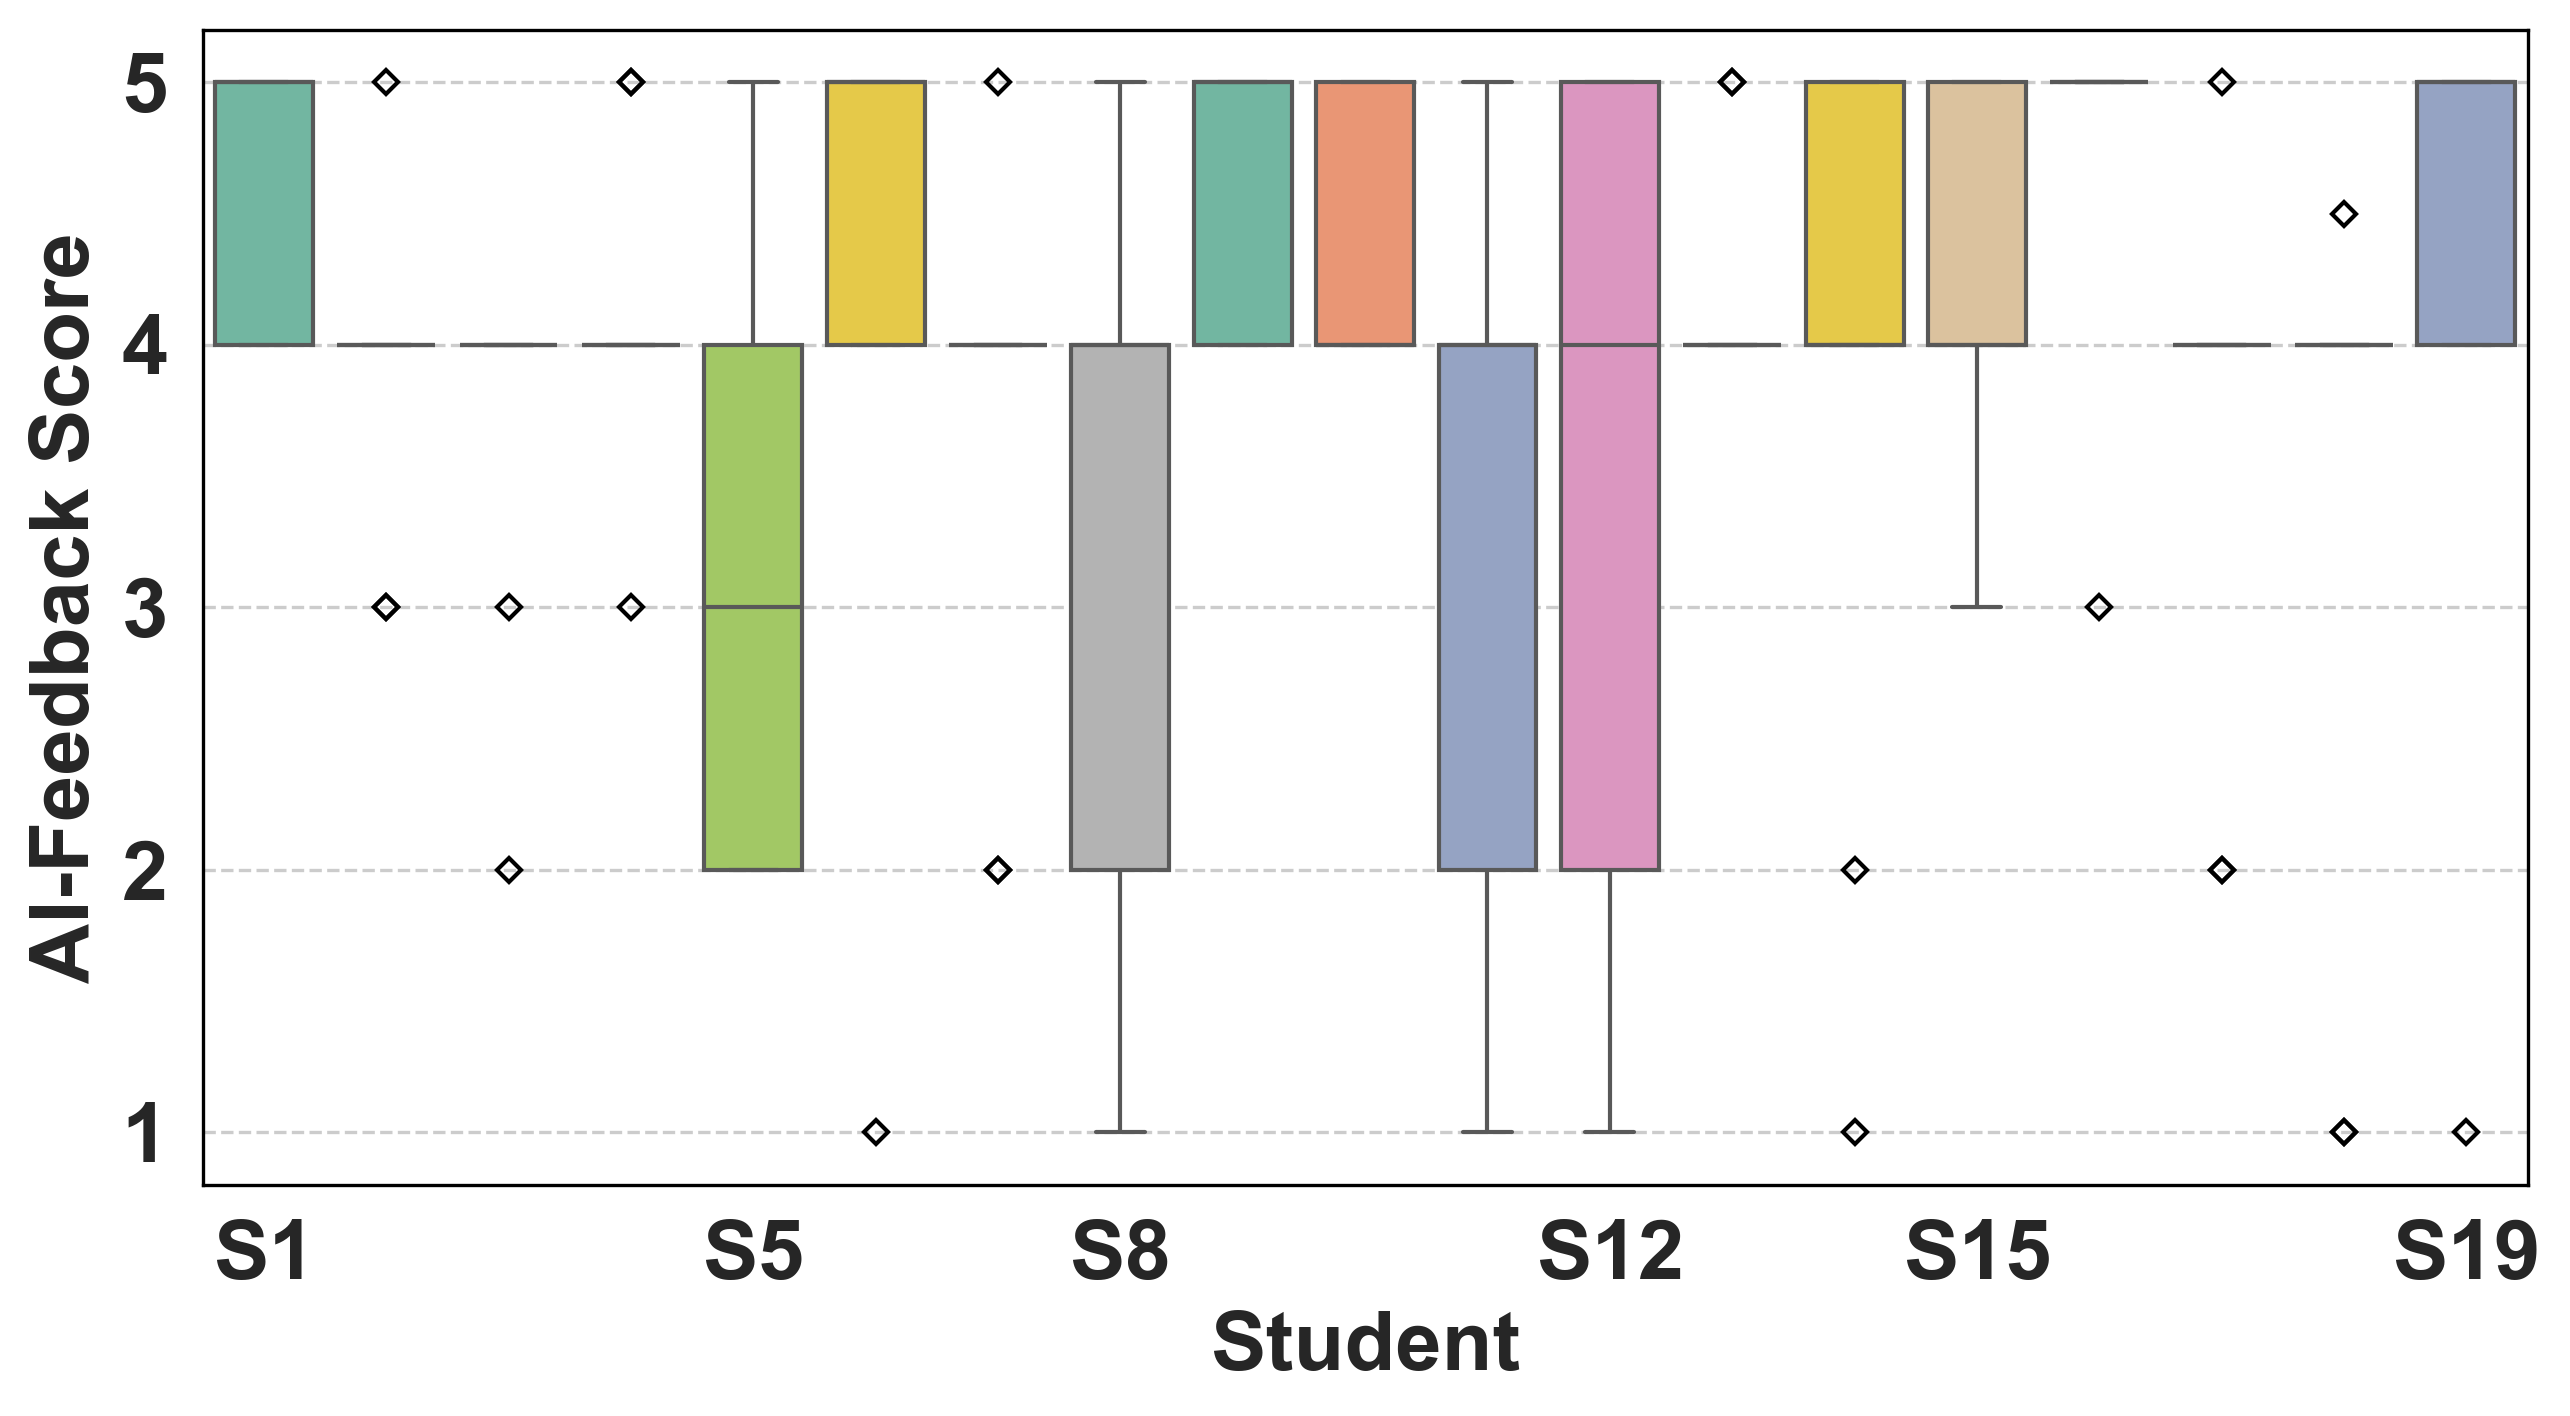

In [ ]:
# AI-Feedback scores plot
plt.figure(figsize=(10, 5))

sns.boxplot(
    x='user_id', 
    y='ai-feedback', 
    data=cl_survey_student_exercise, 
    hue='user_id', 
    palette='Set2',
    flierprops=dict(marker='D', markersize=4)  
)

labels = ['' for _ in range(len(student_order))]
selected_labels = ['S1', 'S5', 'S8', 'S12', 'S15', 'S19']
selected_ticks = [0, 4, 7, 11, 14, 18]  # Indices of S1, S5, S10, S15, S19

# Set the selected labels
for i, tick in enumerate(selected_ticks):
    labels[tick] = selected_labels[i]

# Apply the new labels to the x-ticks
plt.xticks(
    ticks=np.arange(len(student_order)), 
    labels=labels, 
    fontsize=20, 
    fontweight='bold'
)

#plt.title('AI-Feedback Helpfulness Scores', fontsize=10)
plt.xlabel('Student', fontsize=20, fontweight='bold')
plt.ylabel('AI-Feedback Score', fontsize=20)
plt.tick_params(axis='both', labelsize=20)  

plt.savefig('./plot_eps/Student_AI_Feedback_Scores.eps', format='eps') 
plt.show()

In [156]:
# Change exercise number with E1, ..., E9
exercises = cl_survey_student_exercise['exercise_id'].unique()
exercise_mapping = {exercises[i]: f'E{i+1}' for i in range(len(exercises))}
cl_survey_student_exercise['exercise_id'] = cl_survey_student_exercise['exercise_id'].replace(exercise_mapping)
cl_survey_student_exercise

Unnamed: 0 user_id  demanding  effort  satisfied  stress  ai-feedback  \
0             0      S1          4       2          4       3          5.0   
1            19      S1          8       5          4       4          5.0   
2            38      S1          7       4          5       3          5.0   
3            57      S1          2       1          5       1          4.0   
4            76      S1          9       5          5       4          5.0   
..          ...     ...        ...     ...        ...     ...          ...   
166          94     S19          2       2          5       1          5.0   
167         113     S19          3       4          5       1          4.0   
168         132     S19          2       2          5       1          5.0   
169         151     S19          3       4          4       2          5.0   
170         170     S19          2       3          5       1          5.0   

      gpa  prog_level  grade exercise_id  
0    3.95           3     11          E1  
1    3.95           3     11          E2  
2    3.95           3     11          E3  
3    3.95           3     11          E4  
4    3.95           3     11          E5  
..    ...         ...    ...         ...  
166  3.31           3     10          E5  
167  3.31           3     10          E6  
168  3.31           3     10          E7  
169  3.31           3     10          E8  
170  3.31           3     10          E9  

[171 rows x 11 columns]

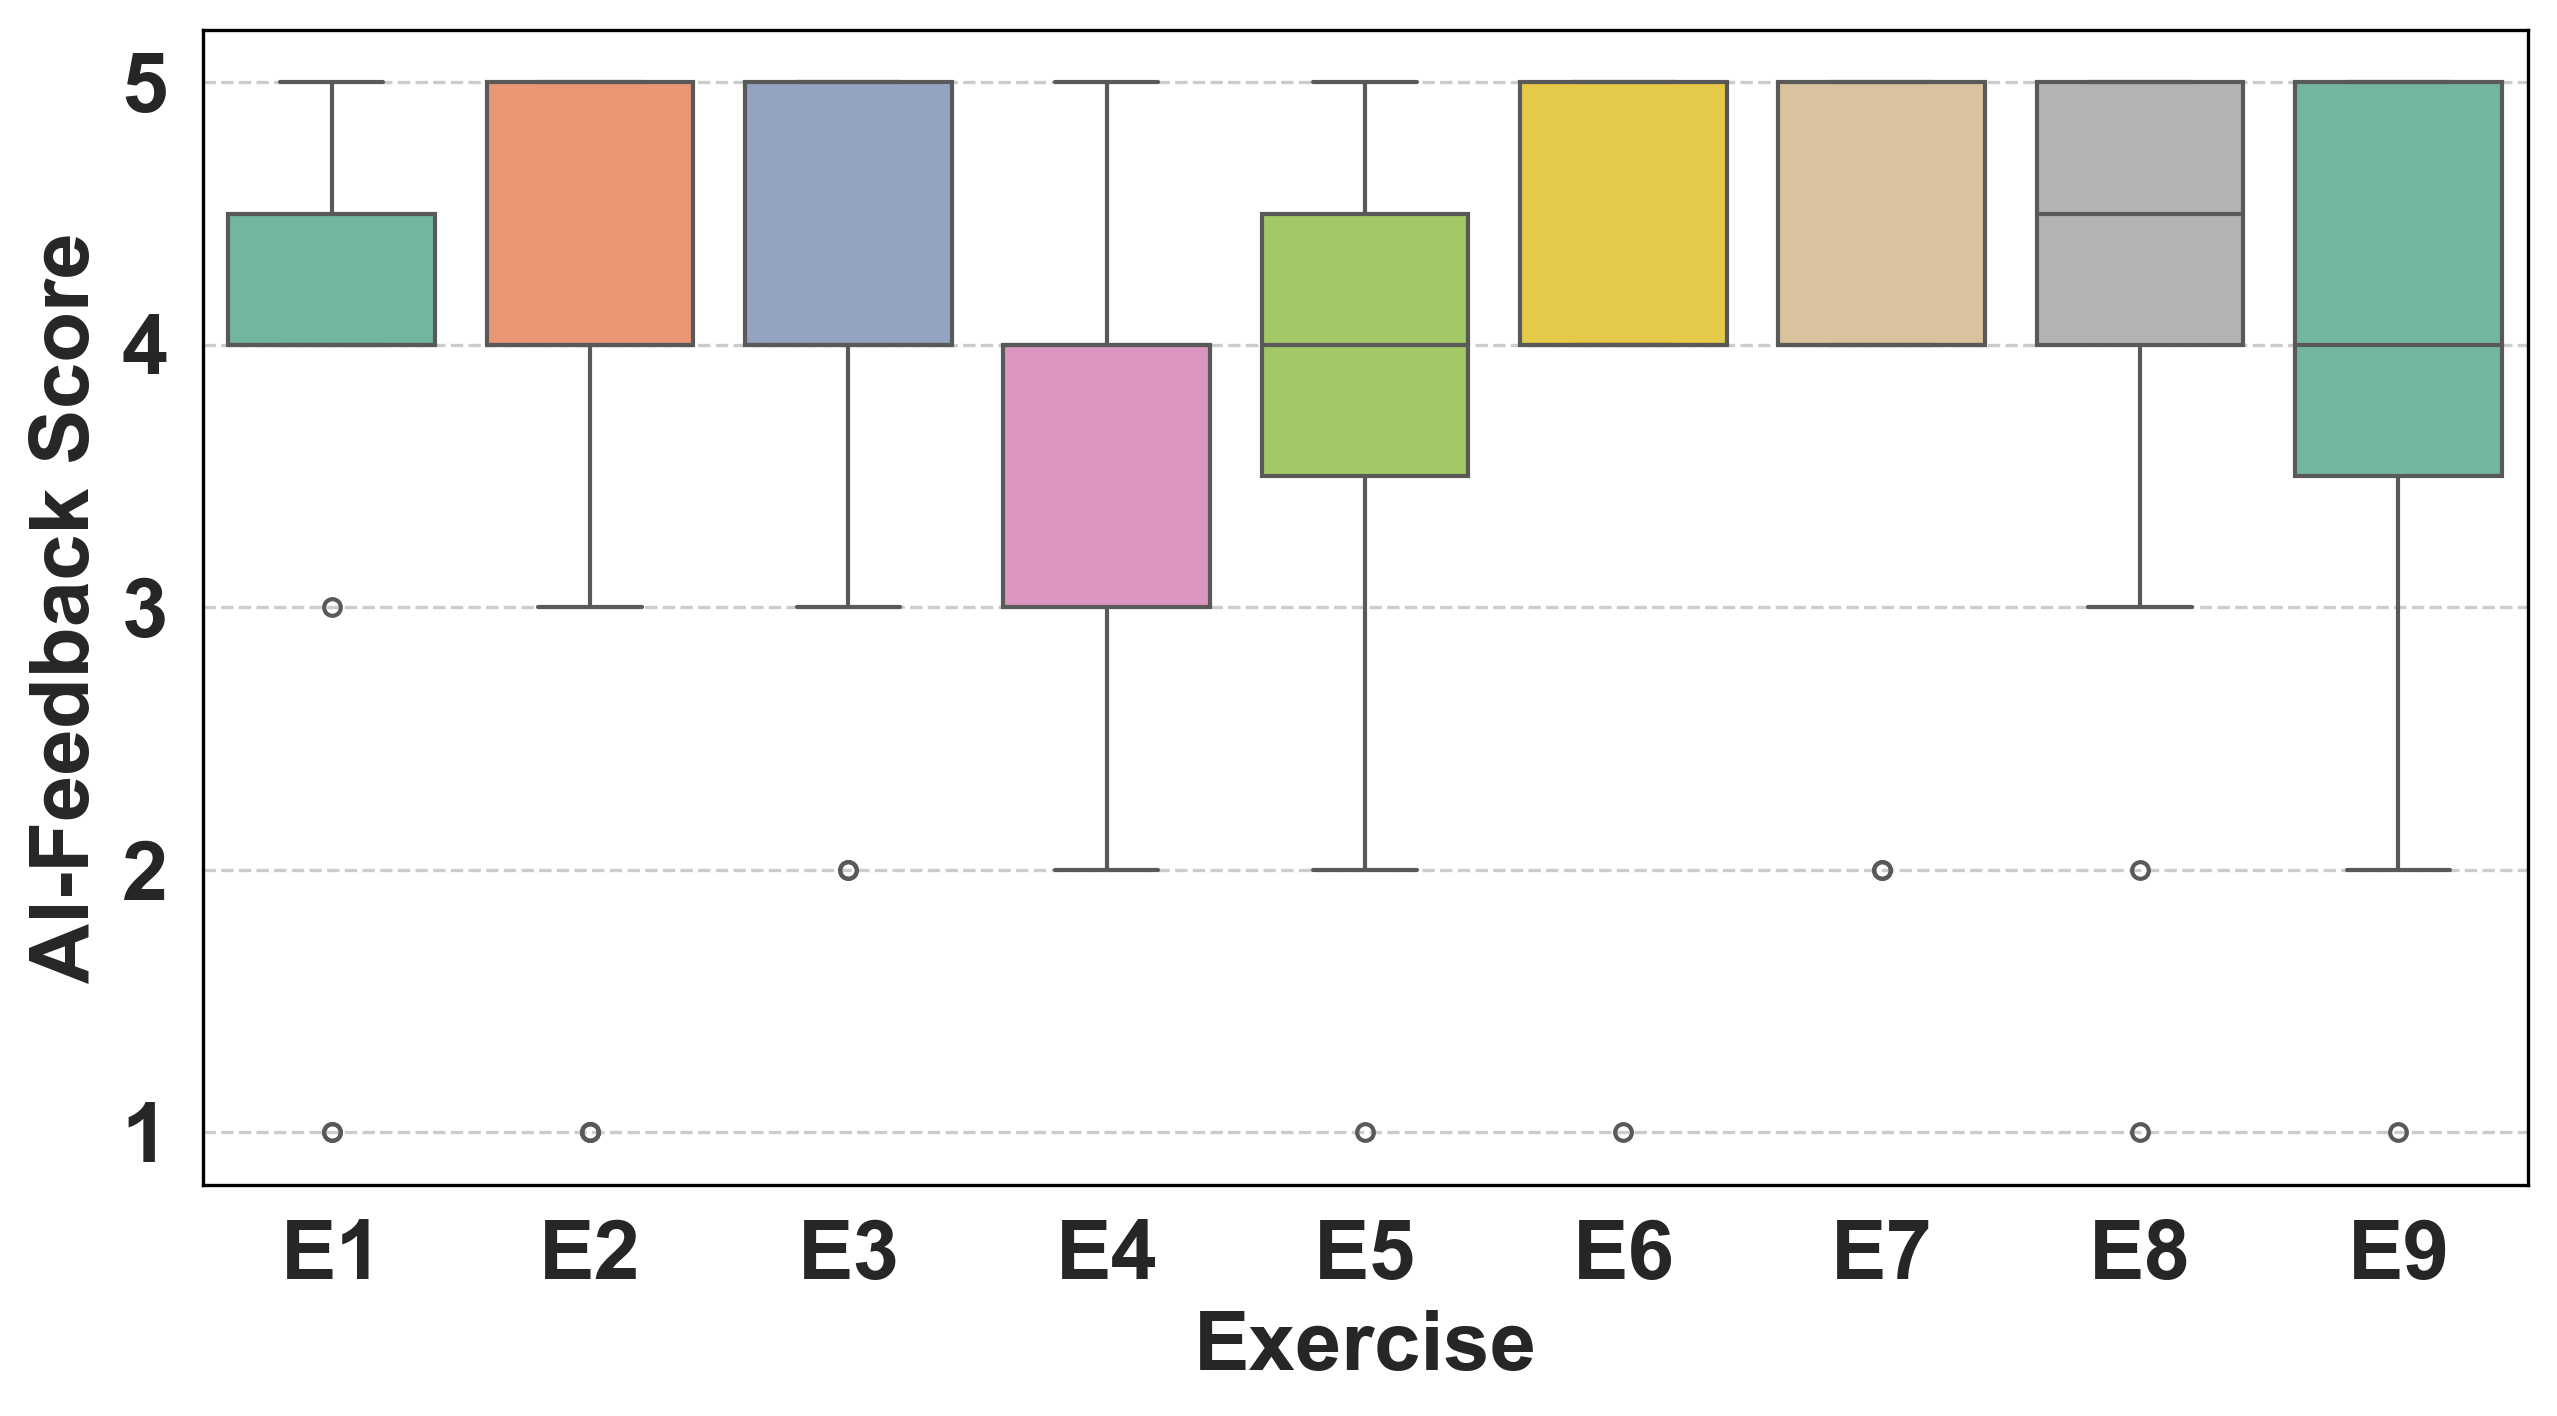

In [ ]:
# AI-Feedback scores plot
plt.figure(figsize=(10, 5))

sns.boxplot(
    x='exercise_id', 
    y='ai-feedback', 
    data=cl_survey_student_exercise, 
    hue='exercise_id', 
    palette='Set2',
    flierprops=dict(marker='o', markersize=4)  
)

# Apply the new labels to the x-ticks
plt.xticks(
    #ticks=np.arange(len(student_order)), 
    #labels=labels, 
    fontsize=20, 
    fontweight='bold'
)

#plt.title('Exercise - AI Feedback Scores', fontsize=10)
plt.xlabel('Exercise', fontsize=20)
plt.ylabel('AI-Feedback Score', fontsize=20)
plt.tick_params(axis='both', labelsize=20)  
plt.legend([], [], frameon=False)

plt.savefig('./plot_eps/Exercise_AI_Feedback_Scores.eps', format='eps') 
plt.show()

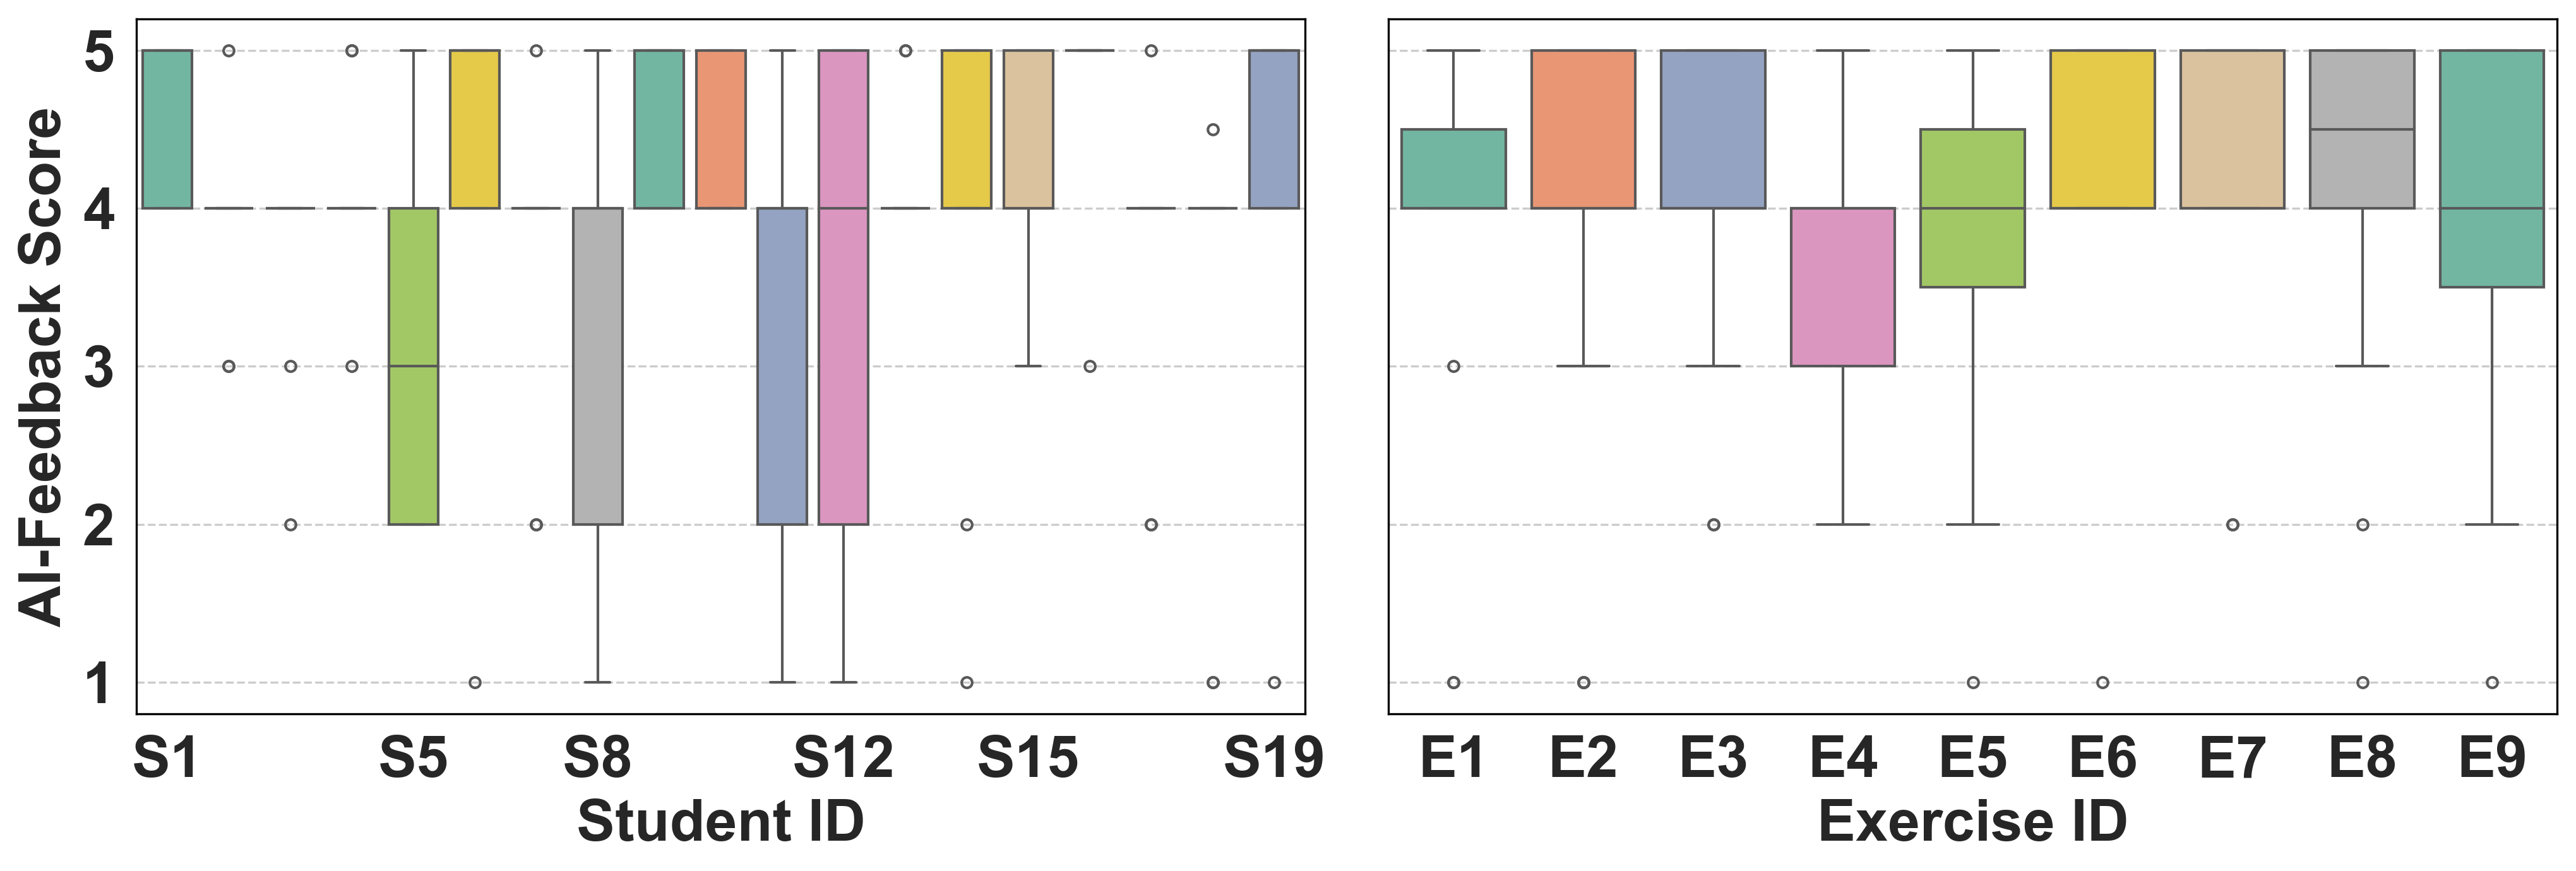

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  

# Set up IEEE-compatible style  
sns.set_style("whitegrid", {'grid.linestyle': '--'})  
sns.set_context("paper", font_scale=1.1)  
sns.set_palette("Set2")  # Using a colorblind-friendly palette  

plt.rcParams.update({  
    'font.size': 20,  
    'font.weight': 'bold',  
    'axes.labelweight': 'bold',  
    'axes.titleweight': 'bold',  
    'figure.dpi': 300,  
    'axes.edgecolor': 'black',  
    'axes.linewidth': 0.8  
})  

# Define selected user IDs for labeling  
selected_labels = ['S1', 'S5', 'S8', 'S12', 'S15', 'S19']
selected_ticks = [0, 4, 7, 11, 14, 18]

# Create figure with two subplots  
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)  

# AI-Feedback scores by Student ID  
sns.boxplot(
    ax=axes[0],
    x='user_id', 
    y='ai-feedback', 
    data=cl_survey_student_exercise, 
    hue='user_id', 
    palette='Set2',
    flierprops=dict(marker='o', markersize=4)  
)

# Set x-ticks and labels only for selected positions  
axes[0].set_xticks(selected_ticks)  
axes[0].set_xticklabels(selected_labels, fontsize=22, fontweight='bold')

axes[0].set_xlabel('Student ID', fontsize=22, fontweight='bold')
axes[0].set_ylabel('AI-Feedback Score', fontsize=22, fontweight='bold')
axes[0].tick_params(axis='both', labelsize=22)
axes[0].legend([], [], frameon=False)  # Remove legend

# AI-Feedback scores by Exercise ID  
sns.boxplot(
    ax=axes[1],
    x='exercise_id', 
    y='ai-feedback', 
    data=cl_survey_student_exercise, 
    hue='exercise_id', 
    palette='Set2',
    flierprops=dict(marker='o', markersize=4)  
)

axes[1].set_xlabel('Exercise ID', fontsize=22, fontweight='bold')
axes[1].set_ylabel('')  # Remove redundant ylabel
axes[1].tick_params(axis='both', labelsize=22)
axes[1].legend([], [], frameon=False)  # Remove legend

# Final adjustments  
plt.tight_layout()  
plt.savefig('./plot_eps/AI_Feedback_Scores_Combined.pdf', bbox_inches='tight')  
plt.show()


In [ ]:
avg_ai_feedback_student = (
    cl_survey_student_exercise
    .groupby('user_id')[['ai-feedback']]
    .agg(['mean', 'median'])  # Compute both mean and median
    .reset_index()
    .round(3)
    .sort_values(by=('ai-feedback', 'mean'), ascending=True)  
)

avg_ai_feedback_student


user_id ai-feedback       
                  mean median
2      S11       3.222    4.0
14      S5       3.333    3.0
9      S18       3.389    4.0
3      S12       3.444    4.0
17      S8       3.444    4.0
16      S7       3.667    4.0
8      S17       3.667    4.0
12      S3       3.667    4.0
5      S14       3.778    4.0
11      S2       3.889    4.0
13      S4       4.111    4.0
4      S13       4.222    4.0
6      S15       4.333    4.0
10     S19       4.333    5.0
15      S6       4.333    5.0
1      S10       4.444    4.0
0       S1       4.556    5.0
18      S9       4.667    5.0
7      S16       4.778    5.0

In [171]:
avg_ai_feedback_exercise = (
    cl_survey_student_exercise
    .groupby('exercise_id')[['ai-feedback']]
    .agg(['mean', 'median'])  # Compute both mean and median
    .reset_index()
    .round(3)
    .sort_values(by=('ai-feedback', 'mean'), ascending=True)  # Sort by mean value
)

avg_ai_feedback_exercise


exercise_id ai-feedback       
                     mean median
3          E4       3.684    4.0
4          E5       3.737    4.0
1          E2       3.789    4.0
8          E9       3.789    4.0
0          E1       3.895    4.0
2          E3       4.158    4.0
7          E8       4.184    4.5
5          E6       4.211    4.0
6          E7       4.211    4.0